## Problem Statement
Geely Auto faces the challenge of identifying which vehicle, manufacturer, and market variables significantly predict car prices in the U.S. and quantifying how well those variables explain price variation, so it can set competitive locally manufactured MSRPs; primary users of the analysis are Geely executives, product/pricing teams, sales & marketing, operations, finance, and dealers, while secondary users include regulators and consultants; solving this is critical because accurate, data-driven pricing affects market entry viability, margin and profitability, product localization decisions, competitive differentiation, and regulatory/incentive optimization—so the project should produce ranked significant predictors, predictive models with performance metrics , interpretability outputs , and actionable pricing recommendations validated via cross‑validation and sensitivity analyses. 


## Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



## IMPORT LIBRARY

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# statistical
from scipy.stats import shapiro

# machine learning
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance

# warnings
import warnings
warnings.simplefilter("ignore")

# visualisasi
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Agar grafik langsung muncul dalam notebook
%matplotlib inline

read data dengan pandas

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

data memiliki 26 kolom, dari 26 kolom tersebut belum tentu semuanya kita gunakan, hal ini akan dilakukan di EDA

In [5]:
# Mengecek setiap kolom untuk data yang unik dan memastikan tipe data sudah benar, yaitu antara bentuknya string atau numerik
# Buat list kosong untuk menyimpan informasi tiap kolom
summary = []

# Loop untuk setiap kolom
for col in data.columns:
    unique_vals = data[col].unique()
    dtype = data[col].dtype
    num_unique = len(unique_vals)

    # Ambil contoh nilai unik (maksimal 5)
    sample_vals = unique_vals[:5]
    sample_vals_str = ', '.join(map(str, sample_vals))
    if num_unique > 5:
        sample_vals_str += ', ...'

    # Tambahkan ke dalam list summary
    summary.append({
        'Column Name': col,
        'Data Type': dtype,
        'Unique Values': num_unique,
        'Sample Values': sample_vals_str
    })

# Buat DataFrame ringkasan
summary_data = pd.DataFrame(summary)
# Tampilkan tabel ringkasan
summary_data

,Column Name,Data Type,Unique Values,Sample Values
0,car_ID,int64,205,"1, 2, 3, 4, 5, ..."
1,symboling,int64,6,"3, 1, 2, 0, -1, ..."
2,CarName,object,147,"alfa-romero giulia, alfa-romero stelvio, alfa-..."
3,fueltype,object,2,"gas, diesel"
4,aspiration,object,2,"std, turbo"
5,doornumber,object,2,"two, four"
6,carbody,object,5,"convertible, hatchback, sedan, wagon, hardtop"
7,drivewheel,object,3,"rwd, fwd, 4wd"
8,enginelocation,object,2,"front, rear"
9,wheelbase,float64,53,"88.6, 94.5, 99.8, 99.4, 105.8, ..."


dari data diatas, terdiri dari 8 data ber tipe float, 8 data bertipe integer dan 10 lainnya bertipe object.

## Dari data diatas bisa kita dapatkan beberapa keterangan seperti dibawah ini:
| Nama Kolom              | Keterangan |
| :---------------- | :---- |
| Car_id        | unique id dari setiap data yang ada |
| Symbolling    | symboling adalah angka integer yang menunjukkan tingkat risiko mobil menurut perusahaan asuransi|
| Car Name      | Nama mobil yang ada |
| FuelType | tipe bahan bakar yang digunakan |
| aspiration | sistem pengapian, standard atau turbo |
| doornumber | Banyaknya pintu pada mobil |
| carbody | Tipe body dari mobil |
| drivewheel | TIpe penggerak mobil |
| enginelocation | Penempatan mesin mobil |
| wheelbase | jarak ban depan dengan ban belakang |
| carlength | Panjang dimensi mobil |
| carwidth | Lebar dimensi mobil |
| carheight | tinggi dimensi mobil |
| curbeight | Berat mobil |
| enginetype | Tipe mesin mobil |
| cylindernumber | banyaknya cylinder pada mobil |
| enginesize | Ukuran mesin |
| fuelsystem | Sistem Bahan bakar |
| boreratio | Rasio torquw |
| stroke | Besarnya piston |
| compressionratio | rasio kompresi |
| horsepower | tenaga kuda mobil |
| peakrpm | RPM tertinggi pada mobil |
| citympg | bensin yang dihabiskan di daerah kota dalam satu galon itu berapa miles |
| highwaympg | bensin yang dihabiskan di daerah jalan tol dalam satu galon itu berapa miles |
| price | Harga mobil |

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


RINGKASAN STRUKTUR DATASET

Dataset terdiri dari 205 baris dan 26 kolom. Setiap kolom mewakili atribut penting dari mobil yang dijual, seperti brand (`CarName`), engine type (`enginetype`), dan harga (`price`)

ada tiga tipe data yang ada pada data yakni Float (8 data), Integer (8 data) dan Object (10 data)

## Exploratory Data Analysis (EDA) and Data Cleaning


<Axes: >

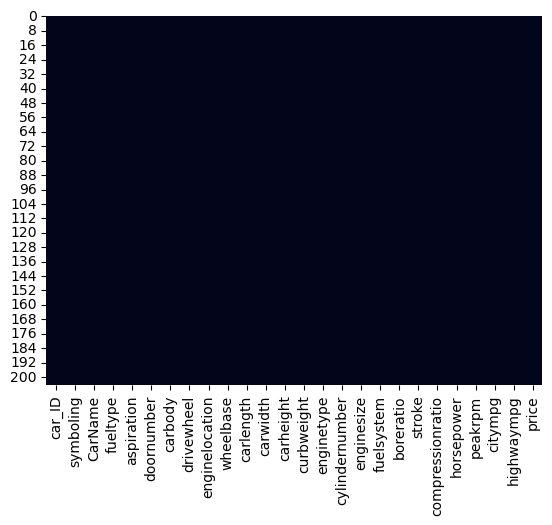

In [8]:
data.isnull().sum()
sns.heatmap(data.isnull(), cbar=False)

Data tidak ada yang null, sehingga tidak usah melakukan fill na ataupun remove null

In [9]:
print('duplicated val: \t', data.duplicated().sum())

duplicated val: 	 0


Tidak ada data yang terduplikasi, sehingga tida ada reimputasi ataupun manipulasi data

In [10]:
data = data.drop(columns=['car_ID', 'symboling', 'boreratio', 'stroke', 'compressionratio'])

menghapus kolom yang tidak akan relate dengan bisnis:
- `car_id`: dihapus karena merupakan id dan tidak akan pengaruh pada bisnis 
- `symboling`: dihapus karena merupakan hanya resiko asuransi 
- `boreratio`: dihapus karena lebih pengaruh efisiensi jarak daripada isian mesin 
- `stroke`: dihapus karena lebih pengaruh efisiensi jarak daripada isian mesin 
- `compressionratio`: dihapus lebih pengaruh efisiensi jarak daripada isian mesin

In [11]:
data['carbrand'] = data['CarName'].apply(lambda x: x.split(' ')[0].lower())
data['cartype'] = data['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]) if len(x.split(' ')) > 1 else 'unknown')
data = data.drop(columns=['CarName'])

Membagi 2 data dari Carname menjadi type dan brand, dimana hal ini penting, karena agar kita lebih bisa memilih brand mana dan tipe apa dari brand tesebut

In [12]:
cols = [col for col in data.columns if col != 'price'] + ['price']
data = data[cols]

melakukan penyesuaian kembali dengan menaruh price di kolom paling bawah agar nyaman dilihat

In [13]:
# Ambil kolom numerik
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Statistik deskriptif untuk kolom numerik
numeric_summary = data[numeric_cols].describe().T
numeric_summary

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
carlength,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
carwidth,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
carheight,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curbweight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
enginesize,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
horsepower,205.0,104.117073,39.544167,48.0,70.0,95.0,116.0,288.0
peakrpm,205.0,5125.121951,476.985643,4150.0,4800.0,5200.0,5500.0,6600.0
citympg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highwaympg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


mencari tahu beberapa nilai rata-rata, standar deviasi, minimal, maximal dan quartil dari data tersebut

In [14]:
import plotly.express as px

fig = px.histogram(data, x='price', nbins=50, title='Distribution of Price')
fig.update_layout(xaxis_title='price', yaxis_title='Frequency')
fig.show()

Dapat dilihat histogram menunjukkan konsentrasi ekstrem di ujung kiri (harga sangat rendah), yang menyebabkan distribusi menjadi sangat miring ke kanan (**right-skewed**).

### Distribusi Fitur Numerik

Pentingnya Melakukan Tes Distribusi Normal dan Alasan Menggunakan Shapiro-Wilk Test
- **Memahami Sifat Data:**
Tes distribusi normal dilakukan untuk mengetahui apakah data mengikuti pola distribusi normal (Gaussian). Hal ini penting karena banyak teknik statistik dan model prediktif mengasumsikan data atau residual yang berdistribusi normal.

- **Memastikan Asumsi Statistik Terpenuhi:**
Beberapa metode statistik, seperti uji parametrik dan analisis regresi, mensyaratkan data berdistribusi normal agar hasilnya valid. Jika asumsi ini tidak terpenuhi, hasil analisis bisa menjadi kurang akurat atau menyesatkan.

- **Menentukan Pendekatan Pemodelan yang Tepat:**
Dengan mengetahui bagaimana distribusi data, kita bisa memutuskan apakah data perlu diubah (misalnya dengan transformasi logaritma) agar mendekati normalitas, atau memilih metode yang tidak terlalu bergantung pada asumsi distribusi normal.

**Keunggulan Shapiro-Wilk Test:**

**Tingkat Sensitivitas Tinggi:** Tes ini sangat efektif mendeteksi apakah data menyimpang dari distribusi normal, terutama untuk ukuran sampel kecil hingga sedang.

**Mudah Digunakan:** Shapiro-Wilk mudah diterapkan menggunakan berbagai perangkat lunak statistik seperti SciPy, serta memberikan nilai p yang membantu menentukan apakah data mengikuti distribusi normal (nilai p < 0,05 biasanya menunjukkan penyimpangan dari distribusi normal).

Melaksanakan tes distribusi normal membantu memastikan bahwa asumsi dasar terpenuhi, sehingga analisis atau model yang dikembangkan menjadi lebih tepat dan dapat diandalkan.

In [15]:
import plotly.express as px
from scipy.stats import shapiro
import warnings
warnings.simplefilter("ignore")

numeric_columns = ['wheelbase', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


for col in numeric_cols:
    print("="*60)
    print(f"Analisis Kolom: {col}")
    
    # 1. Histogram + KDE menggunakan Plotly
    fig = px.histogram(data, x=col, nbins=50, marginal="box", title=f'Distribusi Kolom {col}', opacity=0.7)
    fig.update_layout(bargap=0.2)
    fig.show()
    
    # 2. Shapiro-Wilk Test
    # Pastikan kolom tidak mengandung NaN sebelum dijalankan
    data_non_null = data[col].dropna()
    stat, p_val = shapiro(data_non_null)
    
    print(f"Shapiro-Wilk Test untuk kolom {col}:")
    print(f"  Statistik = {stat:.4f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).")
    else:
        print("  => Data berpotensi terdistribusi normal (Fail to reject H0).")
    print("="*60)
    print("\n")

Analisis Kolom: wheelbase


Shapiro-Wilk Test untuk kolom wheelbase:
  Statistik = 0.9116, p-value = 0.0000
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).


Analisis Kolom: carlength


Shapiro-Wilk Test untuk kolom carlength:
  Statistik = 0.9821, p-value = 0.0104
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).


Analisis Kolom: carwidth


Shapiro-Wilk Test untuk kolom carwidth:
  Statistik = 0.9211, p-value = 0.0000
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).


Analisis Kolom: carheight


Shapiro-Wilk Test untuk kolom carheight:
  Statistik = 0.9842, p-value = 0.0217
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).


Analisis Kolom: curbweight


Shapiro-Wilk Test untuk kolom curbweight:
  Statistik = 0.9530, p-value = 0.0000
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).


Analisis Kolom: enginesize


Shapiro-Wilk Test untuk kolom enginesize:
  Statistik = 0.8294, p-value = 0.0000
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).


Analisis Kolom: horsepower


Shapiro-Wilk Test untuk kolom horsepower:
  Statistik = 0.8836, p-value = 0.0000
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).


Analisis Kolom: peakrpm


Shapiro-Wilk Test untuk kolom peakrpm:
  Statistik = 0.9705, p-value = 0.0003
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).


Analisis Kolom: citympg


Shapiro-Wilk Test untuk kolom citympg:
  Statistik = 0.9572, p-value = 0.0000
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).


Analisis Kolom: highwaympg


Shapiro-Wilk Test untuk kolom highwaympg:
  Statistik = 0.9735, p-value = 0.0007
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).


Analisis Kolom: price


Shapiro-Wilk Test untuk kolom price:
  Statistik = 0.8007, p-value = 0.0000
  => Data kemungkinan TIDAK terdistribusi normal (Reject H0).




**Catatan Penting:** Karena data tidak mengikuti distribusi normal, kita akan menggunakan metode IQR untuk mendeteksi outliers.

### Penggunaan Metode IQR dalam Deteksi Outliers


- **Tidak Bergantung pada Distribusi Normal:**
Metode IQR bersifat non-parametrik dan tidak mengharuskan data mengikuti distribusi normal, sehingga sangat sesuai untuk dataset yang distribusinya tidak normal.

- **Tahan terhadap Pengaruh Outliers:**
Karena metode ini berfokus pada rentang antara kuartil pertama (Q1) dan ketiga (Q3), nilai-nilai ekstrem tidak mempengaruhi perhitungan IQR secara signifikan, sehingga lebih kuat dibandingkan metode yang mengandalkan mean dan standar deviasi.

- **Mudah dan Efektif:**
Perhitungan IQR sederhana dan mudah dipahami, dengan aturan batas bawah dan atas yang biasanya ditentukan sebagai jarak 1,5 kali IQR dari Q1 dan Q3, sehingga metode ini efektif untuk mengidentifikasi data yang sangat berbeda (outliers).

- **Berfokus pada Bagian Tengah Data:**
IQR mencerminkan penyebaran 50% data yang berada di tengah (antara Q1 dan Q3), memberikan gambaran penyebaran data yang lebih stabil dan akurat dalam mengenali outliers.

Kolom: wheelbase
Jumlah Outlier: 3 dari 205 baris data (1.46%).
Batas Bawah = 82.64999999999999, Batas Atas = 114.25000000000001
Nilai Outlier Unik untuk 'wheelbase': [115.6, 120.9]
--------------------------------------------------


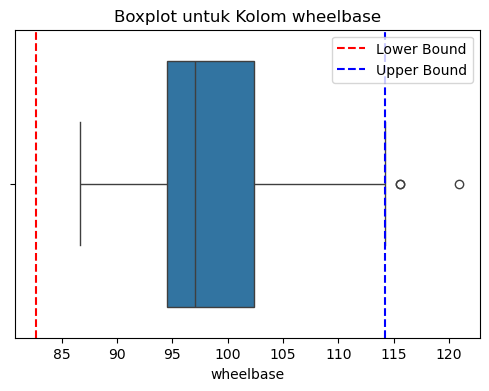

Kolom: carlength
Jumlah Outlier: 1 dari 205 baris data (0.49%).
Batas Bawah = 141.10000000000002, Batas Atas = 208.29999999999995
Nilai Outlier Unik untuk 'carlength': [141.1]
--------------------------------------------------


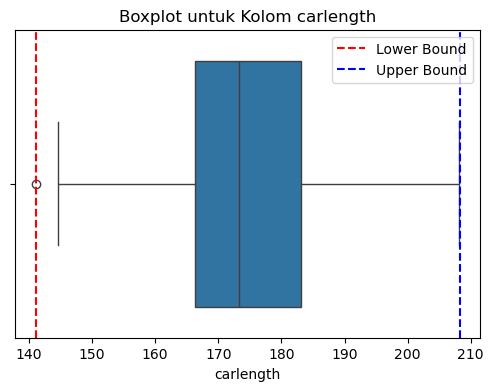

Kolom: carwidth
Jumlah Outlier: 8 dari 205 baris data (3.90%).
Batas Bawah = 59.89999999999998, Batas Atas = 71.10000000000002
Nilai Outlier Unik untuk 'carwidth': [71.4, 71.7, 72.0, 72.3]
--------------------------------------------------


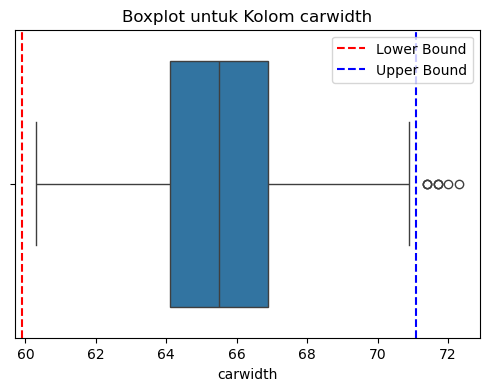

Kolom: carheight
Jumlah Outlier: 0 dari 205 baris data (0.00%).
Batas Bawah = 46.75, Batas Atas = 60.75
--------------------------------------------------


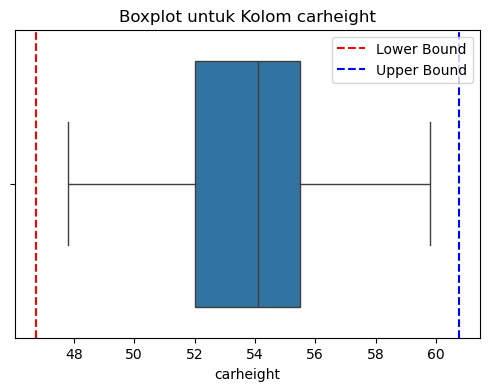

Kolom: curbweight
Jumlah Outlier: 0 dari 205 baris data (0.00%).
Batas Bawah = 960.0, Batas Atas = 4120.0
--------------------------------------------------


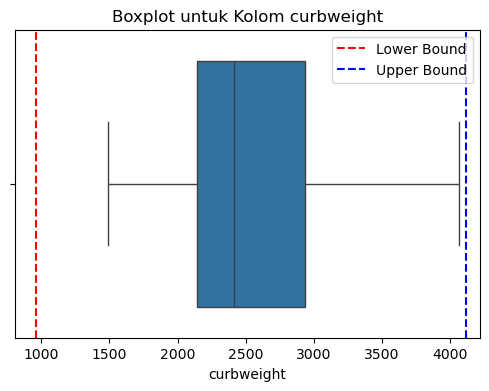

Kolom: enginesize
Jumlah Outlier: 10 dari 205 baris data (4.88%).
Batas Bawah = 31.0, Batas Atas = 207.0
Nilai Outlier Unik untuk 'enginesize': [209, 234, 258, 304, 308, 326]
--------------------------------------------------


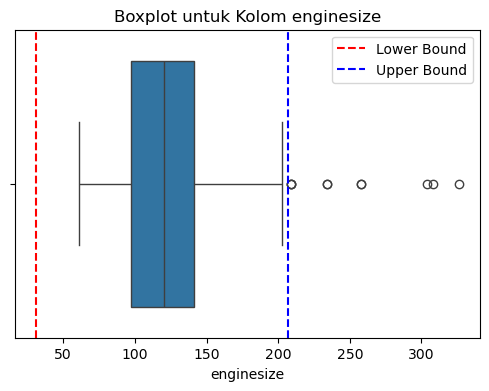

Kolom: horsepower
Jumlah Outlier: 6 dari 205 baris data (2.93%).
Batas Bawah = 1.0, Batas Atas = 185.0
Nilai Outlier Unik untuk 'horsepower': [200, 207, 262, 288]
--------------------------------------------------


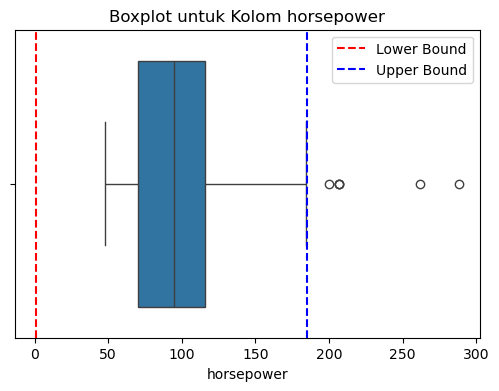

Kolom: peakrpm
Jumlah Outlier: 2 dari 205 baris data (0.98%).
Batas Bawah = 3750.0, Batas Atas = 6550.0
Nilai Outlier Unik untuk 'peakrpm': [6600]
--------------------------------------------------


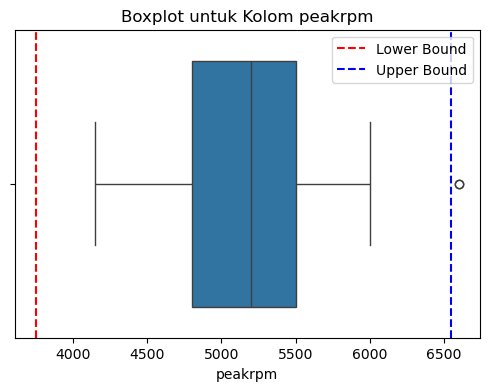

Kolom: citympg
Jumlah Outlier: 2 dari 205 baris data (0.98%).
Batas Bawah = 2.5, Batas Atas = 46.5
Nilai Outlier Unik untuk 'citympg': [47, 49]
--------------------------------------------------


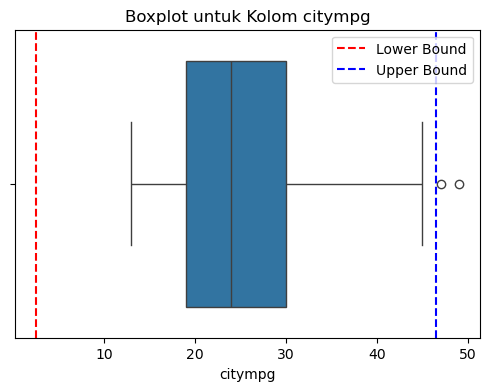

Kolom: highwaympg
Jumlah Outlier: 3 dari 205 baris data (1.46%).
Batas Bawah = 11.5, Batas Atas = 47.5
Nilai Outlier Unik untuk 'highwaympg': [50, 53, 54]
--------------------------------------------------


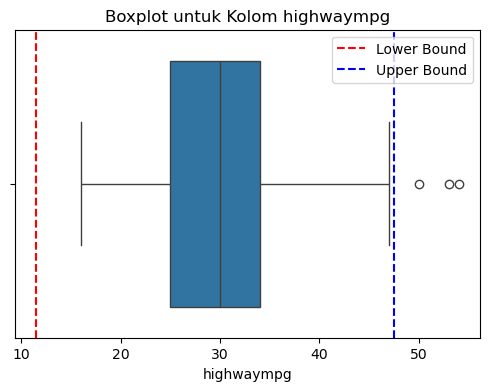

Kolom: price
Jumlah Outlier: 15 dari 205 baris data (7.32%).
Batas Bawah = -5284.5, Batas Atas = 29575.5
Nilai Outlier Unik untuk 'price': [30760.0, 31400.5, 31600.0, 32250.0, 32528.0, 34028.0, 34184.0, 35056.0, 35550.0, 36000.0, 36880.0, 37028.0, 40960.0, 41315.0, 45400.0]
--------------------------------------------------


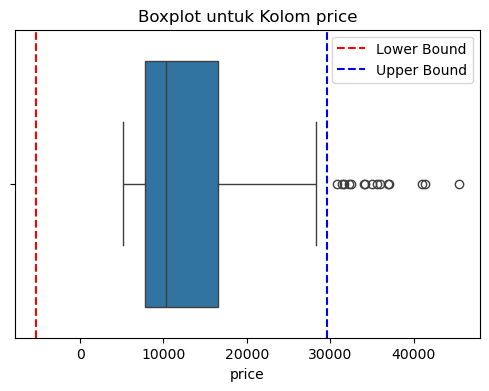

In [16]:
numeric_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

for col in numeric_columns:
    # 1. Menghitung Q1, Q3, dan IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 3. Filter baris-baris yang termasuk outlier
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # 4. Menampilkan jumlah outlier dan persentase relatif terhadap total baris
    total_rows = len(data)
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / total_rows) * 100

    print(f"Kolom: {col}")
    print(f"Jumlah Outlier: {num_outliers} dari {total_rows} baris data ({percentage_outliers:.2f}%).")
    print(f"Batas Bawah = {lower_bound}, Batas Atas = {upper_bound}")

    if num_outliers > 0:
        # Menampilkan semua nilai outlier yang unik untuk kolom tersebut
        unique_outliers = sorted(outliers[col].unique())
        print(f"Nilai Outlier Unik untuk '{col}': {unique_outliers}")

    print("-"*50)

    # 5. Visualisasi dengan Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])

    # Tambahkan garis bantu untuk lower_bound dan upper_bound (opsional)
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound, color='blue', linestyle='--', label='Upper Bound')

    plt.title(f'Boxplot untuk Kolom {col}')
    plt.legend()
    plt.show()

**Catatan Penting:** Berdasarkan apa yang sudah kita deteksi tentang outliers ini, maka kita akan mengambil langkah dengan menghapus outliers

- berdasarkan distribusi diatas, data yang memiliki outlier yakni:
    - `wheelbase`
    - `carwidth`
    - `enginesize`
    - `horsepower`
    - `price`



In [17]:

# Daftar fitur kategorikal
categorical_features = ['cartype', 'carbrand','fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Buat subplot 5 baris x 2 kolom (untuk menampung 10 fitur)
fig = make_subplots(rows=6, cols=2, subplot_titles=[f'Distribusi Kategori: {feat}' for feat in categorical_features])

# Loop setiap fitur
for i, feature in enumerate(categorical_features):
    row = i // 2 + 1
    col = i % 2 + 1

    # Ambil 15 kategori teratas
    top_categories = data[feature].value_counts().nlargest(15).index
    filtered_df = data[data[feature].isin(top_categories)]

    # Hitung frekuensi kategori
    counts = filtered_df[feature].value_counts().loc[top_categories]

    # Buat bar plot (count plot)
    trace = go.Bar(x=counts.index, y=counts.values, name=feature)
    fig.add_trace(trace, row=row, col=col)

    # Rotate label sumbu x
    fig.update_xaxes(tickangle=45, row=row, col=col)
    fig.update_yaxes(title_text='Count', row=row, col=col)

# Update layout keseluruhan
fig.update_layout(height=1300, width=1700, title_text='Distribusi Kategori Fitur (Top 15)', showlegend=False)
fig.show()

- mayoritas masyarakat amerika memiliki mobil peugeot 504,toyota corolla dan toyota corona, hal ini berkorelasi dengan `carbrand` yang didominasi 31 jenis mobil toyota diikuti nissan, mazda, honda dan mitsubishi
- `fueltype` didominasi oleh bahan bakar Gas dengan 185 data
- teruntuk `aspiration` masih didominasi oleh mesin standard
- mayoritas mobil memiliki 4 pintu, tetapi perbandingan dengan yang 2 pintu tidak terlalu jauh perbandingannya dengan mobil 4 pintu
- teruntuk `carbody` varian terbanyak didominasi sedan dan hatchback
- fitur `drivewheel` front wheel drive/ FWD masih menunjukkan nomor 1 di fitur ini
- fitur `enginelocation` sangat didominasi oleh penempatan mesin depan
- `enginetype` didominasi dengan jenis ohc
- `cylindernumber` didominasi olehh 4 silinder
- teruntuk `fuelsystem` didominasi mpfi, 2bbl dan idi


In [18]:
# Create subplots for 2 columns
fig = make_subplots(rows=4, cols=2, subplot_titles=[
    'Distribusi Harga Berdasarkan Tipe drivewheel',
    'Distribusi Harga Berdasarkan Tipe Bahan Bakar',
    'Distribusi Harga Berdasarkan Sistem Pembakaran',
    'Distribusi Harga Berdasarkan Brand',
    'Distribusi Harga Berdasarkan Aspiration',
    'Distribusi Harga Berdasarkan cylinder number',
    'Distribusi Harga Berdasarkan Tipe Kendaraan',
])

# Price vs drive wheel
gear_type_fig = px.box(data[data['price'] > 0], x='drivewheel', y='price', color='drivewheel')
gear_type_fig.update_layout(xaxis_title='drivewheel', yaxis_title='Price', xaxis_tickangle=45)
for trace in gear_type_fig['data']:
    trace.showlegend = False
    fig.add_trace(trace, row=1, col=1)

# Price vs Fuel_Type
fuel_type_fig = px.box(data[data['price'] > 0], x='fueltype', y='price', color='fueltype')
fuel_type_fig.update_layout(xaxis_title='fueltype', yaxis_title='Price', xaxis_tickangle=45)
for trace in fuel_type_fig['data']:
    trace.showlegend = False
    fig.add_trace(trace, row=1, col=2)

# Price vs fuelsystem
origin_fig = px.box(data[data['price'] > 0], x='fuelsystem', y='price', color='fuelsystem')
origin_fig.update_layout(xaxis_title='fuelsystem', yaxis_title='price', xaxis_tickangle=45)
for trace in origin_fig['data']:
    trace.showlegend = False
    fig.add_trace(trace, row=2, col=1)

# Price vs car brand
options_fig = px.box(data[data['price'] > 0], x='carbrand', y='price', color='carbrand')
options_fig.update_layout(xaxis_title='carbrand', yaxis_title='price', xaxis_tickangle=45)
for trace in options_fig['data']:
    trace.showlegend = False
    fig.add_trace(trace, row=2, col=2)

# Price vs aspiration
region_fig = px.box(data[data['price'] > 0], x='aspiration', y='price', color='aspiration')
region_fig.update_layout(xaxis_title='aspiration', yaxis_title='price', xaxis_tickangle=45)
for trace in region_fig['data']:
    trace.showlegend = False
    fig.add_trace(trace, row=3, col=1)


# Price vs cylinder number
cyl_fig = px.box(data[data['price'] > 0], x='cylindernumber', y='price', color='cylindernumber')
cyl_fig.update_layout(xaxis_title='cylindernumber', yaxis_title='price', xaxis_tickangle=45)
for trace in cyl_fig['data']:
    trace.showlegend = False
    fig.add_trace(trace, row=3, col=2)
    
# color_fig = px.box(data[data['price'] > 0], x='cartype', y='price', color='cartype')
# color_fig.update_layout(xaxis_title='cartype', yaxis_title='price', xaxis_tickangle=45)
# for trace in color_fig['data']:
#     trace.showlegend = False
#     fig.add_trace(trace, row=4, col=1)

# Price vs Type (15 largest categories only)
top_types = data['cartype'].value_counts().nlargest(15).index
# top_types = data['cartype']

type_fig = px.box(data[data['cartype'].isin(top_types) & (data['price'] > 0)], x='cartype', y='price', color='cartype')
type_fig.update_layout(xaxis_title='cartype', yaxis_title='price', xaxis_tickangle=45)
for trace in type_fig['data']:
    trace.showlegend = False
    fig.add_trace(trace, row=4, col=1)

# Update layout for the entire figure
fig.update_layout(height=1000, width=1500, title_text="Distribusi Harga Berdasarkan Berbagai Kategori")
fig.show()

- Distribusi harga berdasarkan `Drivewheel` menunjukkan bahwa mobil dengan penggerak belakang (rwd) memiliki median harga lebih tinggi dan variasi harga yang paling besar (banyak outlier di sisi atas), sedangkan fwd memiliki median lebih rendah dan rentang yang lebih sempit. 4wd berada di antara keduanya dengan variasi moderat. Temuan ini menunjukkan bahwa kendaraan rwd cenderung termasuk segmen premium/lebih mahal — dealer bisa menonjolkan unit rwd sebagai pilihan premium di katalog mereka.


- Fitur `Fuel_Type` memperlihatkan bahwa kendaraan diesel cenderung memiliki median harga sedikit lebih tinggi dan IQR lebih lebar dibandingkan bensin (gas), sementara gas menunjukkan beberapa outlier harga tinggi. Ini mengindikasikan bahwa diesel sering diasosiasikan dengan kendaraan yang lebih besar/lebih mahal; peluang: promosikan diesel untuk segmen pengguna yang mencari performa/torsi dan nilai jual kembali lebih tinggi.


- Distribusi harga berdasarkan `Fuelsystem` (mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi) menampilkan perbedaan: tipe idi dan spdi menunjukkan IQR lebih besar dan beberapa outlier tinggi — artinya beberapa model dengan sistem tersebut bernilai tinggi. Sebagian besar tipe lain memiliki distribusi sempit dan median rendah hingga menengah. Rekomendasi: tandai tipe pembakaran tertentu pada deskripsi bila berkaitan dengan model premium.


- Berdasarkan `carbrand`, terlihat variasi harga yang sangat besar antar merek. Beberapa brand menonjolkan median dan outlier sangat tinggi (brand premium), sedangkan banyak brand mass-market menunjukkan median lebih rendah dan distribusi lebih terpusat. Insight: brand adalah penentu kuat posisi harga — buat kategori/halaman khusus untuk brand premium agar pengguna premium lebih mudah menemukan unit yang relevan.


- Distribusi harga berdasarkan `Aspiration` (std vs turbo) menunjukkan bahwa varian turbo memiliki median dan rentang harga lebih tinggi dibanding std. Artinya turbo konsisten dikaitkan dengan nilai lebih tinggi (fitur/performa). Dealer bisa menggarisbawahi varian turbo dalam listing premium dan paket trade‑up.


- Pada fitur `CylinderNumber`, hubungan jelas antara jumlah silinder dan harga: mesin 8/12 silinder (eight, twelve) menunjukkan median sangat tinggi dan rentang ke harga premium; 6 silinder juga relatif tinggi; mesin kecil seperti two dan three memiliki median jauh lebih rendah dan sedikit variasi. Kesimpulan: jumlah silinder efektif untuk segmentasi harga — gunakan sebagai variabel penting dalam model penetapan harga.


- Distribusi berdasarkan `cartype` Kendaraan (model spesifik) menunjukkan beberapa tipe/model (GLC dan G4) memiliki median dan outlier jauh di atas rata‑rata, sementara model city/compact menunjukkan median rendah. Ini mendukung pemetaan model ke segmen: luxury / family / economy. Rekomendasi: sistem rekomendasi dapat memprioritaskan tampilan berdasarkan kategori tipe untuk memudahkan pencarian user sesuai anggaran.

 **Kesimpulan:** Distribusi harga menunjukkan bahwa faktor kategorikal yang paling berkaitan dengan harga tinggi adalah: `carbrand` (premium), `CylinderNumber` (8/12/6), `aspiration` = turbo, dan `drivewheel` = rwd. Faktor seperti `fuelsystem` tertentu (idi/spdi) dan `fueltype` (diesel) juga memiliki pengaruh. Sementara itu, beberapa atribut kategori menunjukkan pengaruh yang lebih lemah terhadap median harga pada plot (mis. beberapa tipe kendaraan mass-market yang sangat konsisten), sehingga atribut tersebut bisa diprioritaskan lebih rendah dalam pemodelan harga.Jika diinginkan, saya dapat:
- Mengonversi semua estimasi ke angka (median/IQR) jika Anda sediakan data.
- Menyusun tabel prioritas fitur untuk modeling (mis. feature importance kasar berdasarkan visual).
- Membuat rekomendasi bisnis konkret (pricing rules, bundling fitur, pengaturan katalog).

## Data Preparation

Removing data from outlier

In [19]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & 
                           (df_clean[column] <= upper_bound)]
    
    return df_clean

# Usage
numeric_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                   'curbweight', 'enginesize', 'horsepower', 'peakrpm', 
                   'citympg', 'highwaympg', 'price']

data = remove_outliers_iqr(data, numeric_columns)

Menghapus outlier yang ada pada gambar sebelumnya, agar data lebih bersih dan memiliki fitur engineering yang tepat dan layak untuk data ini

Kolom: wheelbase
Jumlah Outlier: 6 dari 181 baris data (3.31%).
Batas Bawah = 85.64999999999999, Batas Atas = 109.25000000000001
Nilai Outlier Unik untuk 'wheelbase': [110.0, 114.2]
--------------------------------------------------


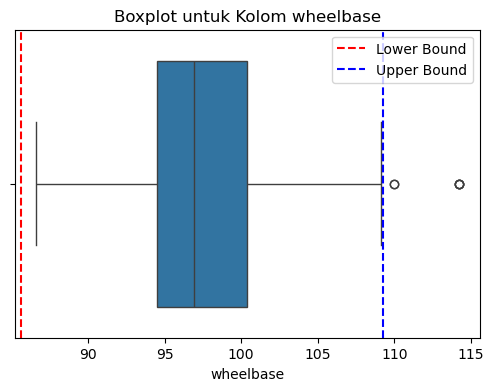

Kolom: carlength
Jumlah Outlier: 5 dari 181 baris data (2.76%).
Batas Bawah = 148.45000000000005, Batas Atas = 196.04999999999995
Nilai Outlier Unik untuk 'carlength': [144.6, 198.9]
--------------------------------------------------


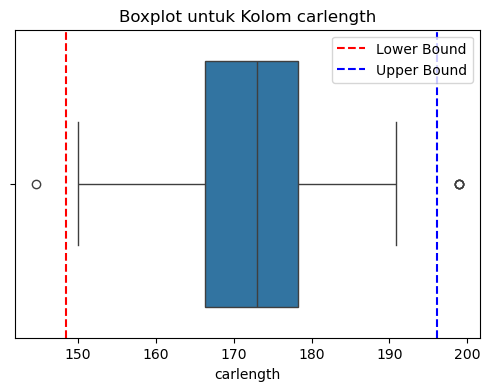

Kolom: carwidth
Jumlah Outlier: 3 dari 181 baris data (1.66%).
Batas Bawah = 60.25, Batas Atas = 70.25
Nilai Outlier Unik untuk 'carwidth': [70.3]
--------------------------------------------------


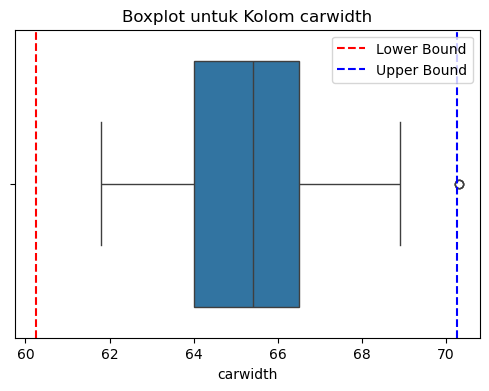

Kolom: carheight
Jumlah Outlier: 0 dari 181 baris data (0.00%).
Batas Bawah = 46.75, Batas Atas = 60.75
--------------------------------------------------


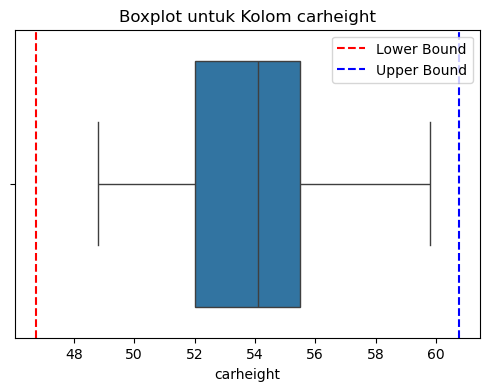

Kolom: curbweight
Jumlah Outlier: 0 dari 181 baris data (0.00%).
Batas Bawah = 1093.0, Batas Atas = 3853.0
--------------------------------------------------


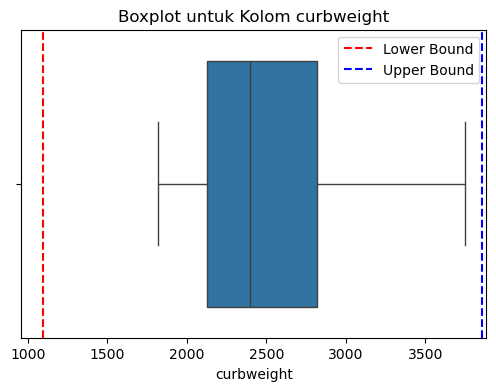

Kolom: enginesize
Jumlah Outlier: 0 dari 181 baris data (0.00%).
Batas Bawah = 38.5, Batas Atas = 194.5
--------------------------------------------------


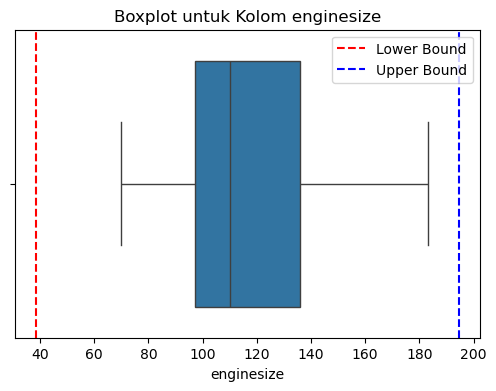

Kolom: horsepower
Jumlah Outlier: 0 dari 181 baris data (0.00%).
Batas Bawah = 4.0, Batas Atas = 180.0
--------------------------------------------------


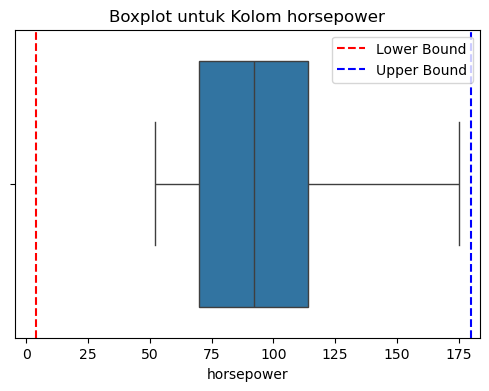

Kolom: peakrpm
Jumlah Outlier: 0 dari 181 baris data (0.00%).
Batas Bawah = 3750.0, Batas Atas = 6550.0
--------------------------------------------------


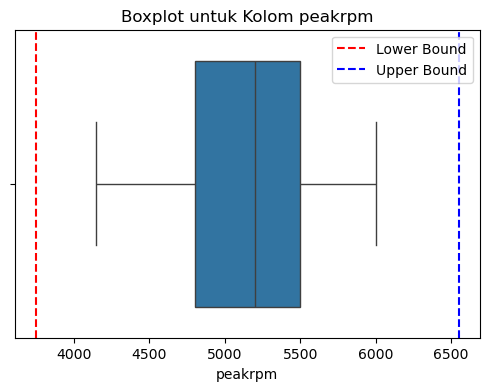

Kolom: citympg
Jumlah Outlier: 0 dari 181 baris data (0.00%).
Batas Bawah = 6.0, Batas Atas = 46.0
--------------------------------------------------


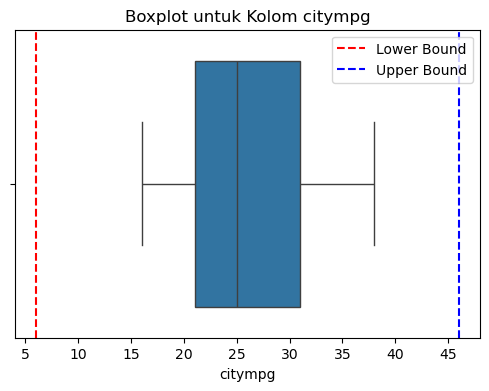

Kolom: highwaympg
Jumlah Outlier: 0 dari 181 baris data (0.00%).
Batas Bawah = 12.0, Batas Atas = 52.0
--------------------------------------------------


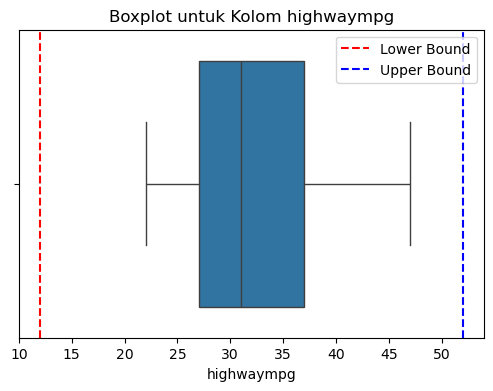

Kolom: price
Jumlah Outlier: 2 dari 181 baris data (1.10%).
Batas Bawah = -2958.5, Batas Atas = 25565.5
Nilai Outlier Unik untuk 'price': [28176.0, 28248.0]
--------------------------------------------------


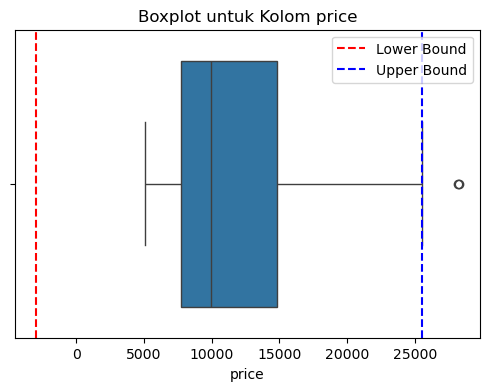

In [20]:
numeric_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

for col in numeric_columns:
    # 1. Menghitung Q1, Q3, dan IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 3. Filter baris-baris yang termasuk outlier
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # 4. Menampilkan jumlah outlier dan persentase relatif terhadap total baris
    total_rows = len(data)
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / total_rows) * 100

    print(f"Kolom: {col}")
    print(f"Jumlah Outlier: {num_outliers} dari {total_rows} baris data ({percentage_outliers:.2f}%).")
    print(f"Batas Bawah = {lower_bound}, Batas Atas = {upper_bound}")

    if num_outliers > 0:
        # Menampilkan semua nilai outlier yang unik untuk kolom tersebut
        unique_outliers = sorted(outliers[col].unique())
        print(f"Nilai Outlier Unik untuk '{col}': {unique_outliers}")

    print("-"*50)

    # 5. Visualisasi dengan Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])

    # Tambahkan garis bantu untuk lower_bound dan upper_bound (opsional)
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound, color='blue', linestyle='--', label='Upper Bound')

    plt.title(f'Boxplot untuk Kolom {col}')
    plt.legend()
    plt.show()

In [21]:
data.enginelocation.unique()

array(['front'], dtype=object)

In [22]:
data=data.drop(columns=['enginelocation'])

karena data engine location setelah dilakukan cleaning outlier, hanya tinggal front saja alangkah baiknya untuk dihapus atau drop column dahulu

Matriks Korelasi (Spearman):
            wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
wheelbase    1.000000   0.908798  0.813903   0.634440    0.788597    0.693723   
carlength    0.908798   1.000000  0.875674   0.544860    0.890140    0.788672   
carwidth     0.813903   0.875674  1.000000   0.377418    0.842227    0.750040   
carheight    0.634440   0.544860  0.377418   1.000000    0.390541    0.244729   
curbweight   0.788597   0.890140  0.842227   0.390541    1.000000    0.852748   
enginesize   0.693723   0.788672  0.750040   0.244729    0.852748    1.000000   
horsepower   0.540939   0.652661  0.666983   0.034925    0.774902    0.772515   
peakrpm     -0.285907  -0.267839 -0.190907  -0.299955   -0.263601   -0.327994   
citympg     -0.486570  -0.634484 -0.636129  -0.086354   -0.772903   -0.655995   
highwaympg  -0.521493  -0.657095 -0.649685  -0.142807   -0.799716   -0.661447   
price        0.734425   0.810323  0.799529   0.293508    0.894357    0.771477   

Text(0.5, 1.0, 'Spearman Correlation Heatmap')

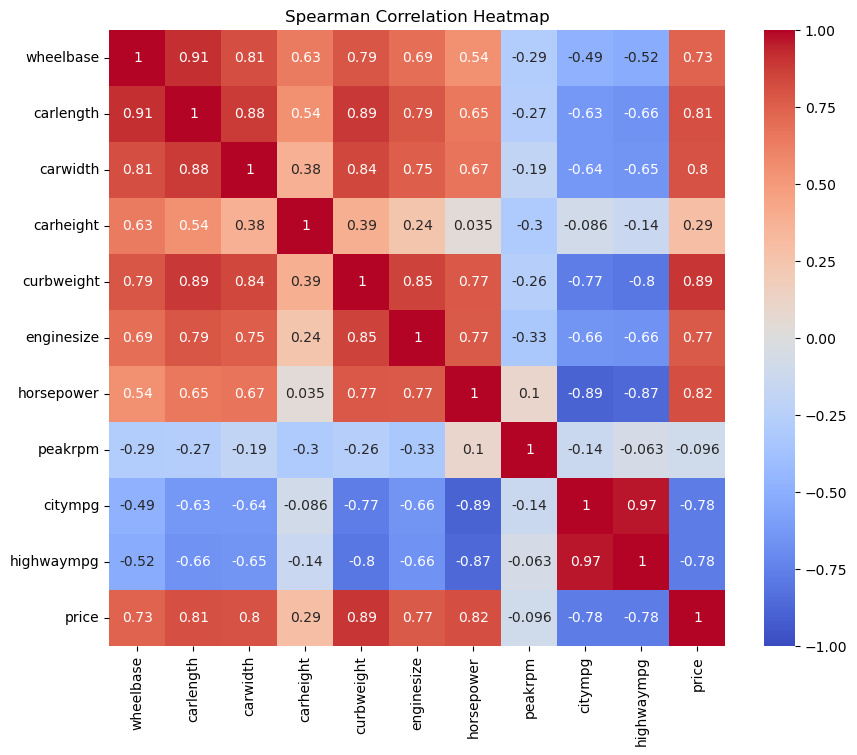

In [23]:
# Daftar kolom yang ingin dilihat korelasinya
cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# 1) Membuat subset DataFrame hanya dengan 4 kolom numerik tersebut
data_corr = data[cols].copy()

# 2) Menghitung korelasi dengan metode Spearman (karena data non-normal)
corr_matrix = data_corr.corr(method='spearman')

# 3) Menampilkan nilai korelasi dalam bentuk tabel
print("Matriks Korelasi (Spearman):")
print(corr_matrix)

# 4) Visualisasi dengan Heatmap Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,        # menampilkan nilai korelasi di tiap sel
            cmap='coolwarm',   # skema warna
            vmin=-1, vmax=1,   # mengatur rentang warna dari -1 s/d 1
            square=True)       # sel heatmap berbentuk kotak

plt.title('Spearman Correlation Heatmap')

HAPUS MULTICOLINEARITY

In [24]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','peakrpm','citympg','highwaympg']]

X = X.dropna()

vif_data = []
for i in range(X.shape[1]):
    vif_value = variance_inflation_factor(X.values, i)
    vif_data.append([X.columns[i], vif_value])

vif = pd.DataFrame(vif_data, columns=['feature', 'VIF'])
vif = vif.sort_values('VIF', ascending=False)
print(vif)

      feature          VIF
2    carwidth  2502.433762
0   wheelbase  2175.716441
1   carlength  1818.222143
3   carheight   916.726420
9  highwaympg   558.358445
8     citympg   448.187086
4  curbweight   327.117290
7     peakrpm   227.280135
5  enginesize   110.043471
6  horsepower    76.181204


In [25]:
data = data.drop(columns=['carlength', 'carwidth', 'enginesize', 'curbweight', 'highwaympg'])

dari data diatas, carlength, carwidth, enginesize, curbweight dan highwaympg memiliki kolinearitas yang sangat tinggi dan nilai VIF yang tinggi

Matriks Korelasi (Spearman):
            wheelbase  carheight  horsepower   peakrpm   citympg     price
wheelbase    1.000000   0.634440    0.540939 -0.285907 -0.486570  0.734425
carheight    0.634440   1.000000    0.034925 -0.299955 -0.086354  0.293508
horsepower   0.540939   0.034925    1.000000  0.100864 -0.893131  0.817119
peakrpm     -0.285907  -0.299955    0.100864  1.000000 -0.138955 -0.096186
citympg     -0.486570  -0.086354   -0.893131 -0.138955  1.000000 -0.775594
price        0.734425   0.293508    0.817119 -0.096186 -0.775594  1.000000


Text(0.5, 1.0, 'Spearman Correlation Heatmap')

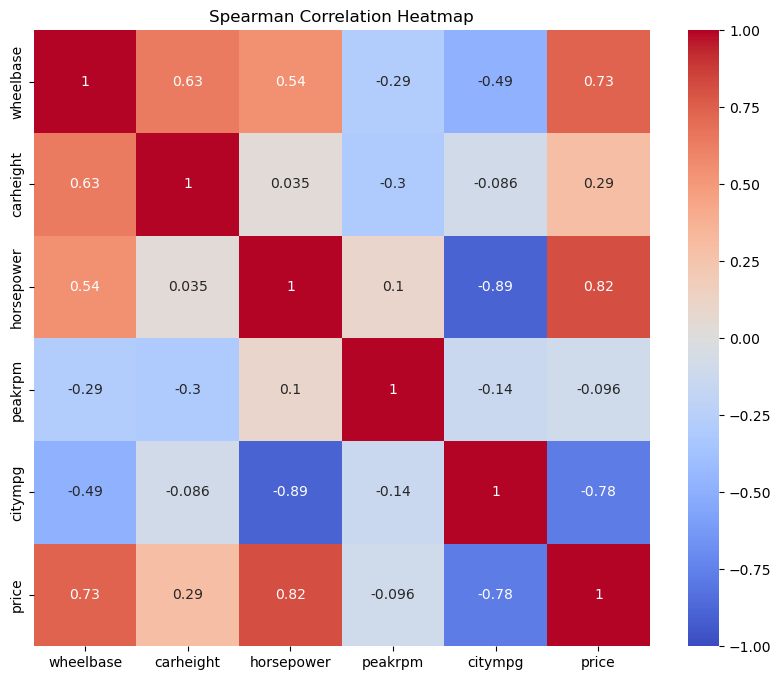

In [26]:
# Daftar kolom yang ingin dilihat korelasinya
cols = ['wheelbase', 'carheight',  'horsepower', 'peakrpm','citympg',  'price']

# 1) Membuat subset DataFrame hanya dengan 4 kolom numerik tersebut
data_corr = data[cols].copy()

# 2) Menghitung korelasi dengan metode Spearman (karena data non-normal)
corr_matrix = data_corr.corr(method='spearman')

# 3) Menampilkan nilai korelasi dalam bentuk tabel
print("Matriks Korelasi (Spearman):")
print(corr_matrix)

# 4) Visualisasi dengan Heatmap Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,        # menampilkan nilai korelasi di tiap sel
            cmap='coolwarm',   # skema warna
            vmin=-1, vmax=1,   # mengatur rentang warna dari -1 s/d 1
            square=True)       # sel heatmap berbentuk kotak

plt.title('Spearman Correlation Heatmap')

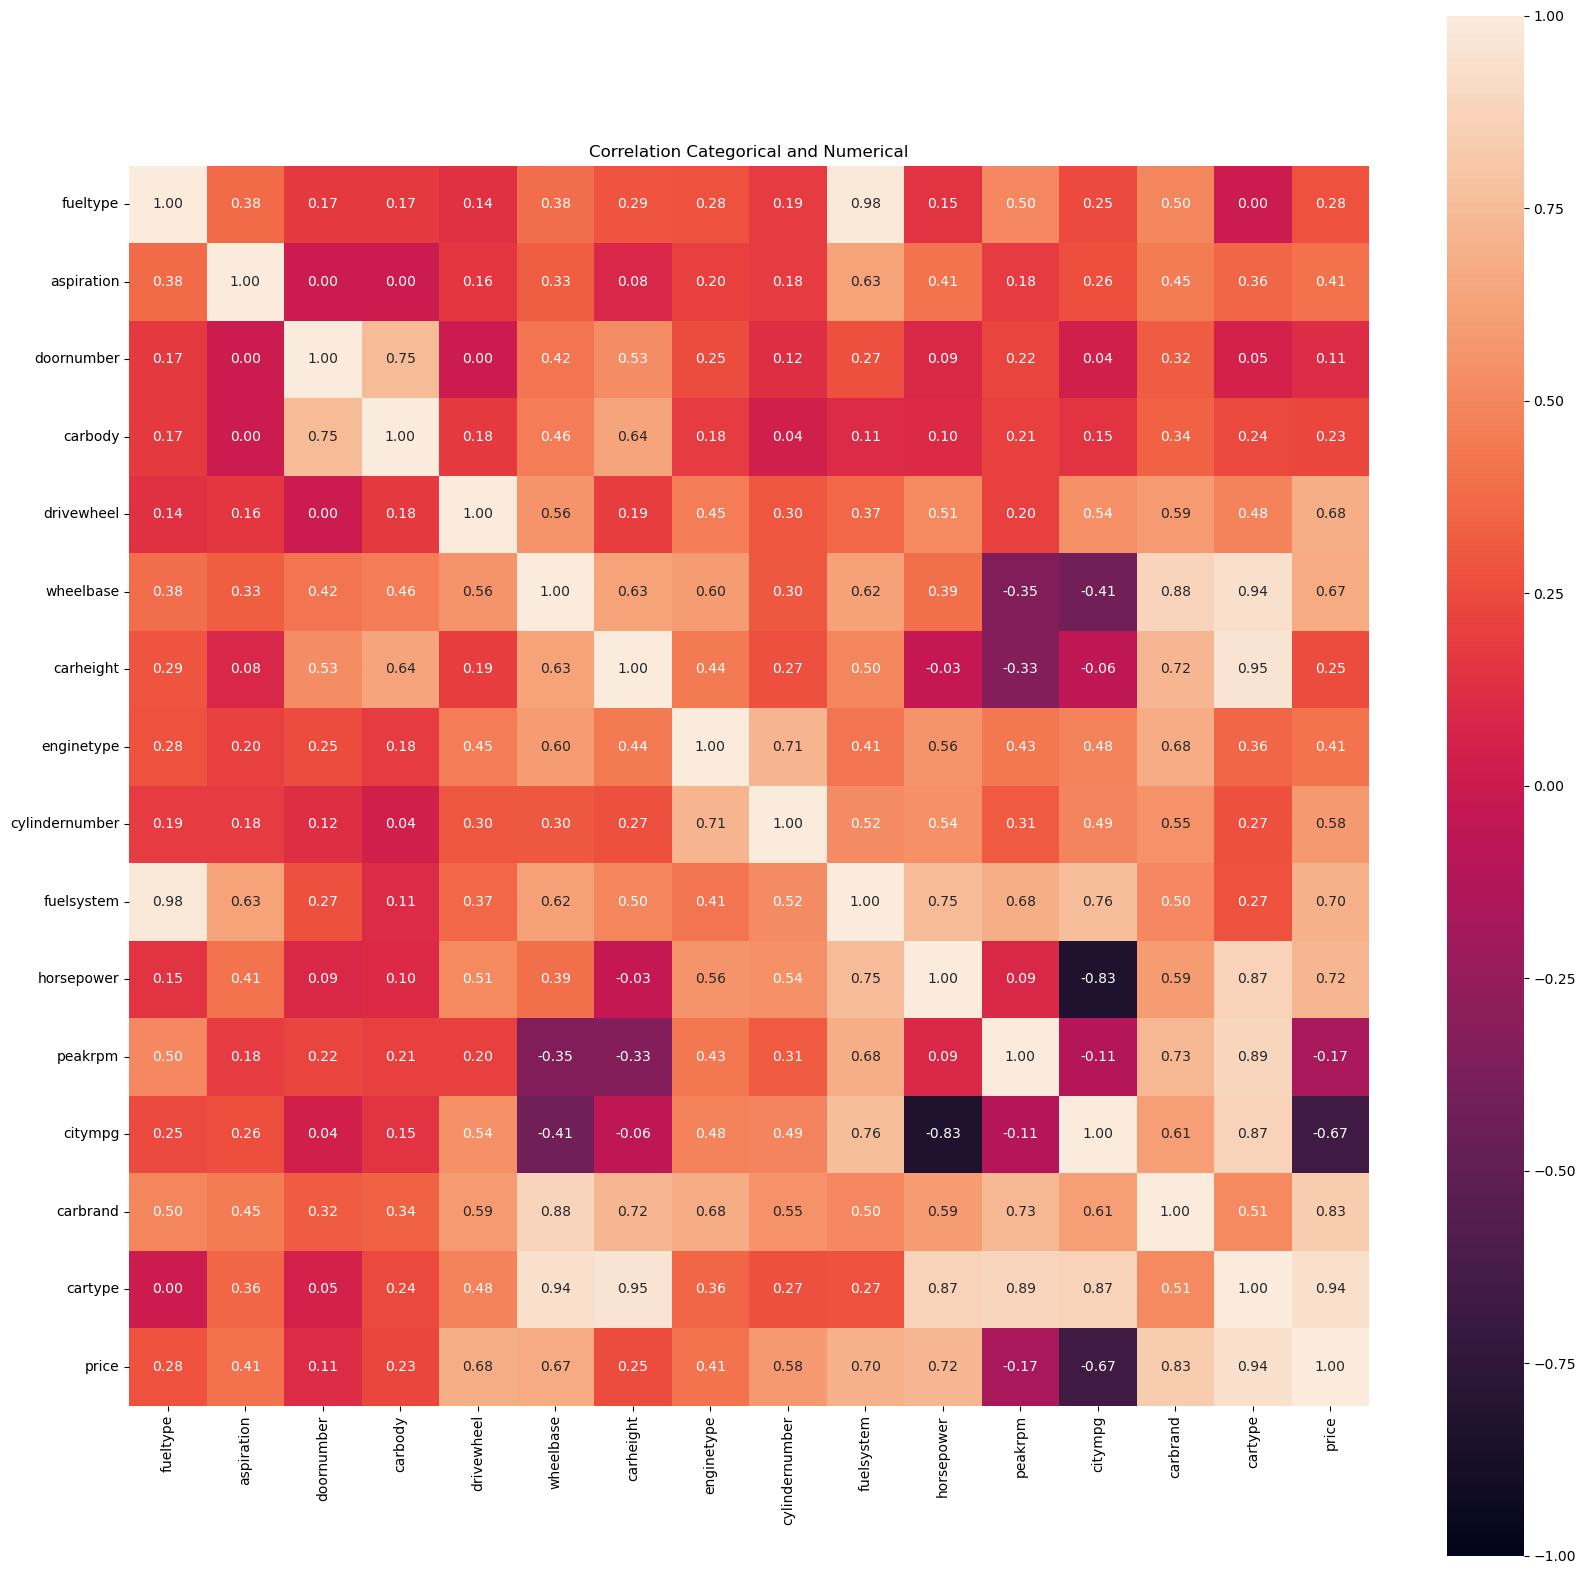

In [27]:
from dython.nominal import associations
#Correlation Matrix
complete_correlation = associations(
    data,
    cmap='rocket',
    title='Correlation Categorical and Numerical',
    figsize=(20,20),
    annot=True
)

correlation_matrix = complete_correlation['corr']
plt.show()

fitur tersisa 15 saja dan itu sudah cukup

In [28]:
data.describe()

,wheelbase,carheight,horsepower,peakrpm,citympg,price
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,98.371823,53.772376,96.845304,5105.248619,25.773481,11431.034072
std,5.150052,2.439378,29.225718,453.213917,5.625198,4863.201951
min,86.600000,48.800000,52.000000,4150.000000,16.000000,5118.000000
25%,94.500000,52.000000,70.000000,4800.000000,21.000000,7738.000000
50%,96.900000,54.100000,92.000000,5200.000000,25.000000,9960.000000
75%,100.400000,55.500000,114.000000,5500.000000,31.000000,14869.000000
max,114.200000,59.800000,175.000000,6000.000000,38.000000,28248.000000


In [29]:
data.describe(include='object')

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,carbrand,cartype
count,181,181,181,181,181,181,181,181,181,181
unique,2,2,2,5,3,6,4,8,25,122
top,gas,std,four,sedan,fwd,ohc,four,mpfi,toyota,504
freq,163,147,105,83,114,139,155,74,29,6


setelah melakukan data preparation, dari 205 data sekarang menjadi 181 yang berarti data yang terhapus sebanyak 24 saja

## MODELING



### **Train-Test Split Sebelum Encoding & Scaling**

Untuk menghindari **information leakage**, proses **train-test split** dilakukan terlebih dahulu sebelum encoding dan scaling. Hal ini memastikan bahwa model tidak "mengintip" informasi dari data test selama pelatihan.

---

###  **Encoding**

#### a. **Target Encoding**

Digunakan untuk kolom kategorikal dengan banyak kategori unik: `['cartype', 'carbrand']`. TargetEncoder menggunakan nilai target (`Price`) untuk membantu encoding, sehingga hanya di-*fit* pada `X_train` dengan `y_train`.

#### b. **Ordinal Encoding**

Digunakan untuk fitur kategorikal dengan sedikit kategori unik: `['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'cylindernumber', 'fuelsystem', 'enginetype']`.

---

###  **Feature Scaling**

Digunakan `StandardScaler` dari `sklearn` untuk menormalisasi fitur numerik: `['wheelbase', 'carheight', 'horsepower', 'peakrpm', 'citympg']`, agar fitur berada dalam skala yang seragam.

---

### **Model Regresi yang Digunakan**

Beberapa algoritma regresi digunakan untuk membandingkan performa prediksi harga mobil bekas:

#### Base Models
- **Linear Regression:**  
  Mengestimasikan hubungan linier antara fitur dan target dengan mencari koefisien yang meminimalkan error kuadrat, ideal untuk hubungan yang linear dan data bebas multikolinearitas serta outlier ekstrim.

- **KNN Regressor:**  
  Menghitung nilai target berdasarkan rata-rata nilai dari 'k' tetangga terdekat dalam ruang fitur; efektif untuk pola lokal, namun sensitif terhadap skala fitur dan data berdimensi tinggi.

- **Decision Tree Regressor:**  
  Membagi data secara rekursif dengan membuat keputusan berdasarkan nilai fitur, sehingga menghasilkan struktur pohon yang memetakan fitur ke target; mampu menangkap hubungan non-linier namun rentan terhadap overfitting jika tidak dikendalikan.

- **Ridge, Lasso, dan Elastic Net:**  
  Merupakan varian Linear Regression dengan penambahan regularisasi (L2 untuk Ridge, L1 untuk Lasso, dan kombinasi keduanya untuk Elastic Net) yang membantu mengatasi multikolinearitas dan mencegah overfitting dengan mengurangi kompleksitas model.

#### Ensemble Models
- **Random Forest Regressor:**  
  Menggabungkan prediksi dari banyak decision tree yang dilatih secara acak pada subset data dan fitur (bagging) untuk mengurangi variansi dan meningkatkan stabilitas prediksi.

- **AdaBoost Regressor:**  
  Mengadaptasi bobot data secara iteratif, sehingga model lebih fokus pada contoh yang sulit diprediksi; membantu meningkatkan akurasi dengan mengurangi bias, namun bisa terpengaruh oleh outlier.

- **Gradient Boosting Regressor:**  
  Membangun model secara berurutan dengan setiap pohon mencoba memperbaiki kesalahan residual dari model sebelumnya; efektif menangkap pola kompleks, namun memerlukan tuning agar tidak overfit.

- **Xtreme Gradient Boosting (XGBoost):**  
  Versi yang dioptimasi dari gradient boosting yang menambahkan regularisasi dan teknik komputasi efisien, sehingga cocok untuk dataset besar dan kompleks dengan kinerja tinggi bila telah dituning dengan baik.
  
#### Model Dapat Dipercaya (Akurat) Jika:
- **Data Training Representatif:**  
  Data yang digunakan untuk melatih model mencakup seluruh variabilitas yang mungkin ditemui di dunia nyata, sehingga model dapat menangani kasus baru dengan karakteristik serupa.

- **Asumsi Model Terpenuhi:**  
  Misalnya, untuk Linear Regression, hubungan antara fitur dan target bersifat linier; untuk model tree-based, data cukup bersih dari noise ekstrim.

- **Validasi dan Cross-Validation Konsisten:**  
  Metrik performa (seperti RMSE, MAE, dan R²) menunjukkan performa yang baik dan konsisten antara data pelatihan, validasi, dan test set, serta analisis residual menunjukkan error yang tersebar acak.

- **Data Baru Sesuai dengan Data Training:**  
  Input baru yang akan diprediksi memiliki karakteristik (rentang nilai, distribusi) yang mirip dengan data yang digunakan untuk melatih model.

#### Model Tidak Dapat Dipercaya (Kurang Akurat) Jika:
- **Data Tidak Representatif atau Out-of-Distribution:**  
  Data baru yang memiliki pola, rentang, atau distribusi yang sangat berbeda dari data training, seperti data dengan outlier ekstrim atau kondisi yang belum pernah terjadi selama pelatihan.

- **Overfitting atau Underfitting Terjadi:**  
  Model yang terlalu kompleks mungkin menghafal noise pada data pelatihan (overfitting) atau model yang terlalu sederhana tidak menangkap pola penting (underfitting), sehingga performa di dunia nyata menurun.

- **Data Bermasalah:**  
  Data yang banyak mengandung noise, missing values, atau kesalahan pencatatan dapat mengurangi akurasi prediksi model.

#### Data yang Membuat Model Bisa Dipercaya dan Tidak dipercaya

- **Data yang Membuat Model Bisa Dipercaya (Akurat):**
  - Data yang sudah melalui proses pembersihan dan preprocessing (misalnya, imputasi missing values, scaling, encoding) dengan konsisten.
  - Data yang mencakup rentang nilai dan distribusi yang sama dengan data training.
  - Data dengan sedikit noise dan outlier yang sudah diatasi melalui teknik seperti IQR.

- **Data yang Membuat Model Tidak Dapat Dipercaya (Kurang Akurat):**
  - Data yang memiliki fitur atau pola yang berbeda secara signifikan dibandingkan dengan data training (misalnya, perubahan tren pasar yang belum tercermin di data lama).
  - Data yang mengandung banyak outlier, noise, atau missing values yang tidak ditangani dengan baik.
  - Data dari segmen yang jarang atau tidak terwakili dalam data training, sehingga model kesulitan memberikan prediksi yang akurat.

- **Base models** memberikan gambaran awal dengan pendekatan algoritma yang berbeda, yang membantu memahami karakteristik dasar data.
- **Ensemble models** memanfaatkan kekuatan kolektif dari beberapa model untuk meningkatkan akurasi, mengurangi overfitting, dan menghasilkan prediksi yang lebih robust.

---
### Evaluasi Model Menggunakan RMSE, MAE, MAPE, dan R²

Dalam proyek prediksi harga mobil bekas, digunakan **4 metrik evaluasi** untuk menilai performa model, yaitu RMSE, MAE, MAPE, dan R². Di bawah ini dijelaskan cara kerja masing-masing metrik dan bagaimana kaitannya dengan aspek bisnis:

#### 1. Root Mean Squared Error (RMSE)
- **Definisi:**  
  RMSE dihitung sebagai akar dari rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual, yaitu:  
  
- **Cara Kerja:**  
  Dengan mengkuadratkan selisih, RMSE memberikan penalti lebih besar terhadap error yang besar; kemudian, dengan mengakarnya, hasilnya dikembalikan ke satuan yang sama dengan target.
- **Kelebihan:**  
  - Sensitif terhadap error besar, sehingga mengungkapkan jika ada prediksi yang jauh meleset.  
  - Satuan output sama dengan target (misalnya, rupiah), memudahkan interpretasi.
- **Hubungan dengan Aspek Bisnis:**  
  Dalam konteks bisnis, kesalahan besar dalam prediksi harga dapat mengakibatkan keputusan yang merugikan (misalnya, overpricing atau underpricing mobil). RMSE membantu mengidentifikasi dan meminimalkan dampak kesalahan ekstrim tersebut sehingga keputusan penetapan harga lebih andal.

#### 2. Mean Absolute Error (MAE)
- **Definisi:**  
  MAE adalah rata-rata selisih absolut antara prediksi dan nilai aktual:  

- **Cara Kerja:**  
  MAE menghitung nilai kesalahan tanpa memperhatikan arah (positif atau negatif) dan memberikan gambaran rata-rata seberapa jauh prediksi menyimpang dari nilai sebenarnya.
- **Kelebihan:**  
  - Mudah diinterpretasikan karena memberikan nilai error dalam satuan yang sama.  
  - Kurang sensitif terhadap outlier dibandingkan RMSE.
- **Hubungan dengan Aspek Bisnis:**  
  MAE memberikan pandangan yang realistis tentang seberapa besar rata-rata selisih prediksi dengan harga sebenarnya. Ini sangat berguna dalam penganggaran dan perencanaan keuangan karena menyampaikan perkiraan kerugian atau keuntungan secara rata-rata dalam transaksi harga mobil.

#### 3. Mean Absolute Percentage Error (MAPE)
- **Definisi:**  
  MAPE mengukur kesalahan rata-rata dalam bentuk persentase dari nilai aktual:  

- **Cara Kerja:**  
  Dengan menghitung error relatif terhadap nilai aktual, MAPE menghasilkan nilai persentase yang menunjukkan seberapa besar kesalahan dibandingkan dengan nilai yang diharapkan.
- **Kelebihan:**  
  - Hasil berupa persentase memudahkan pemahaman oleh pemangku kepentingan non-teknis.  
  - Memungkinkan perbandingan antar model dan kondisi pasar yang berbeda.
- **Hubungan dengan Aspek Bisnis:**  
  Dalam bisnis, MAPE memudahkan analisis risiko dan profitabilitas karena menunjukkan error dalam konteks persentase. Misalnya, mengetahui bahwa model memiliki error 5% dapat langsung diterjemahkan ke dalam estimasi keakuratan harga dan potensi margin keuntungan atau kerugian.

#### 4. R-squared (R²)
- **Definisi:**  
  R² mengukur proporsi variabilitas target yang dapat dijelaskan oleh model, dihitung dengan:  

- **Cara Kerja:**  
  R² membandingkan total varians yang dijelaskan oleh model dengan total varians dalam data aktual. Nilai mendekati 1 berarti model dapat menjelaskan sebagian besar variabilitas.
- **Kelebihan:**  
  - Memberikan indikasi seberapa baik model menangkap pola dan hubungan dalam data.  
  - Mudah dipahami, karena nilainya berkisar antara 0 (tidak ada penjelasan) hingga 1 (penjelasan sempurna).
- **Hubungan dengan Aspek Bisnis:**  
  R² memberikan gambaran kepercayaan terhadap model dalam menjelaskan harga mobil. Nilai yang tinggi menunjukkan bahwa model dapat diandalkan dalam membuat prediksi, sehingga strategi bisnis, seperti penetapan harga atau evaluasi pasar, dapat dilakukan dengan keyakinan lebih tinggi.

---

Dengan menggunakan kombinasi keempat metrik ini, kita mendapatkan gambaran yang komprehensif tentang performa model. Secara bisnis, hal ini penting karena membantu memastikan bahwa:
- **Kesalahan Prediksi** tidak terlalu besar sehingga dapat mengganggu profitabilitas.
- **Konsistensi dan Stabilitas** model dapat diandalkan untuk keputusan strategis.
- **Perbandingan Kinerja** antar model dapat dilakukan secara objektif dengan melihat dampak kesalahan dalam konteks nilai uang dan risiko bisnis.

Dengan mengkombinasikan keempat metrik evaluasi ini, kita mendapatkan gambaran yang komprehensif tentang performa model:
- **RMSE** dan **MAE** menilai kesalahan absolut dengan cara yang berbeda (sensitivitas terhadap outlier).
- **MAPE** menyajikan kesalahan dalam bentuk persentase, memudahkan interpretasi terutama jika skala harga sangat bervariasi.
- **R²** menunjukkan seberapa baik model dapat menangkap variabilitas data.

Pendekatan ini memungkinkan perbandingan yang adil antara 6 base model dan 4 ensemble model, sehingga model akhir yang dipilih tidak hanya akurat tetapi juga konsisten dan relevan dengan kebutuhan bisnis dalam prediksi harga mobil bekas.


In [30]:
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Daftar kolom untuk encoding dan scaling
target_encoded_features = ['cartype', 'carbrand']  
ordinal_features = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'cylindernumber', 'fuelsystem', 'enginetype']
numerical_features = ['wheelbase', 'carheight', 'horsepower', 'peakrpm', 'citympg']

# Pisahkan fitur dan target
X = data.drop('price', axis=1)
y = data['price']

# Split data sebelum encoding dan scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

target_encoder = ce.TargetEncoder(cols=target_encoded_features)
X_train = target_encoder.fit_transform(X_train, y_train)
X_test = target_encoder.transform(X_test)

# Ordinal Encoding (fit hanya pada X_train)
ordinal_encoder = ce.OrdinalEncoder(cols=ordinal_features)
X_train = ordinal_encoder.fit_transform(X_train)
X_test = ordinal_encoder.transform(X_test)

# Scaling (fit hanya pada X_train)
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Lihat isinya X_train
X_train

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,horsepower,peakrpm,citympg,carbrand,cartype
81,1,1,1,1,1,-0.406579,-1.820534,1,1,1,-0.328993,-0.295096,-0.132502,10867.161054,11325.010463
83,1,2,1,1,1,-0.484642,-1.494113,1,1,2,1.532053,-0.295096,-1.163873,10867.161054,11325.010463
39,1,1,2,2,1,-0.367547,0.097190,1,1,3,-0.394293,1.522819,0.211288,10781.472521,11156.912925
19,1,1,1,1,1,-0.757863,-0.759666,1,1,1,-0.916692,0.613862,2.102134,10783.843545,10825.136315
52,1,1,1,1,1,-1.031084,0.097190,1,1,1,-0.981992,-0.295096,0.898868,11401.542021,10890.190552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,2,1,1,3,-0.484642,-1.494113,1,1,2,1.532053,-0.295096,-1.163873,10744.713877,11666.808036
21,1,1,1,1,1,-0.913989,-1.249298,1,1,1,-0.981992,0.841101,1.930239,10945.592777,10731.067888
110,2,2,2,3,3,3.086746,1.974111,3,1,5,-0.100444,-2.226630,-0.132502,12343.923404,12107.192361
203,2,2,2,2,3,2.091441,0.668427,1,2,5,0.258705,-0.749574,0.039393,13241.743468,12929.640888


In [31]:
# Daftar model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Simpan hasil evaluasi
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2
    })

# Hasil evaluasi
results_df = pd.DataFrame(results).set_index('Model')
results_df = results_df.sort_values(by='MAPE', ascending=True)
results_df


,RMSE,MAE,MAPE,R2
Model,,,,
Decision Tree Regressor,4251.493199,2915.869378,0.256508,0.210786
Gradient Boosting Regressor,3758.406148,2901.705444,0.264294,0.383236
Random Forest Regressor,3935.020816,2992.196172,0.272723,0.323908
XGBoost Regressor,4003.550643,3067.670885,0.279838,0.300154
Linear Regression,3492.410698,2986.733348,0.298660,0.467448
Lasso Regression,3493.266576,2987.426527,0.298732,0.467187
Ridge Regression,3534.819242,3020.466031,0.302308,0.454435
Support Vector Regressor,4925.618301,3736.706630,0.325455,-0.059335
KNN Regressor,3861.838114,3371.600903,0.343408,0.348822


###  Analisis Hasil Evaluasi (`results_df`)

Tabel hasil evaluasi model disimpan dalam `results_df`, yang berisi metrik evaluasi seperti RMSE, MAE, MAPE, dan R² untuk setiap model regresi. Tabel ini **diurutkan berdasarkan nilai MAPE terkecil** terlebih dahulu, karena MAPE (Mean Absolute Percentage Error) adalah salah satu indikator penting dalam memprediksi harga mobil bekas, terutama untuk interpretasi bisnis.

---

###  Penjelasan MAPE

**MAPE** mengukur rata-rata kesalahan prediksi dalam bentuk **persentase terhadap nilai aslinya**. Semakin kecil nilai MAPE, semakin akurat model tersebut.

Sebagai contoh:

* Nilai MAPE sebesar `0.2565` berarti bahwa model melakukan kesalahan prediksi sebesar **25.65%** secara rata-rata dari nilai sebenarnya.
* Dalam konteks prediksi **harga mobil**, ini berarti jika harga mobil sebenarnya adalah Rp 100.000.000, maka prediksi model bisa meleset sekitar **Rp 25.650.000** rata-ratanya.

---

###  Model Terbaik Berdasarkan MAPE

Dari hasil `results_df`, dua model dengan performa terbaik berdasarkan nilai **MAPE terkecil** adalah:

| Model                 | MAPE     |
| --------------------- | -------- |
| **Decision Tree Regressor**     | 0.2565 |
| **Gradient Boosting Regressor** | 0.2642 |

* **Decision Tree Regressor** memiliki MAPE **25.65%**
* **Gradient Boosting Regressor** memiliki MAPE **26.42%**

 **Selisih MAPE antara keduanya adalah sekitar `0.0077` atau 0.77%**, yang sangat kecil.

---

###  Langkah Selanjutnya: Hyperparameter Tuning

Karena kedua model memiliki performa yang sangat mirip, maka pada tahap selanjutnya akan dilakukan **hyperparameter tuning** untuk:

* Mengoptimalkan kinerja masing-masing model
* Mencari tahu apakah dengan penyetelan parameter yang tepat, salah satu dari model tersebut bisa secara signifikan mengungguli yang lainnya

Langkah ini penting untuk memastikan bahwa model yang dipilih benar-benar memberikan prediksi harga mobil bekas yang paling akurat dan stabil.

## Hyperparameter Tuning (Menggunakan Optuna)

### **Alasan Menggunakan Optuna**

Pada tahap tuning pertama akan menggunakan **Optuna** sebagai metode optimasi hyperparameter, dibandingkan pendekatan tradisional seperti **Grid Search** maupun **Randomized Search CV**.

Alasan utama memilih **Optuna**:

*  **Efisiensi Eksplorasi Ruang Parameter**: Optuna menggunakan pendekatan **Bayesian optimization (TPE Sampler)** yang lebih cerdas dalam memilih kombinasi parameter berdasarkan hasil sebelumnya.
*  **Lebih Cepat dan Lebih Adaptif**: Optuna secara otomatis mengevaluasi parameter yang menjanjikan, menghemat waktu dibanding grid search yang brute-force.
*  **Lebih Akurat** dalam menemukan kombinasi optimal dibanding RandomizedSearchCV yang hanya mengambil kombinasi secara acak.

---

### **K-Fold Cross Validation dengan Repeats**

Menggunakan metode validasi silang **Repeated K-Fold Cross Validation** (`RepeatedKFold`) dengan 5 folds dan 3 pengulangan.

**Alasan menggunakan RepeatedKFold**:

*  Memberikan estimasi yang lebih **stabil dan robust** dengan mengurangi variansi dari satu kali pembagian data.
*  Kombinasi folds yang beragam meningkatkan representasi generalisasi model.

---

### **Parameter yang Dituning**

Optuna dikonfigurasi untuk mengeksplorasi kombinasi hyperparameter berikut:

| Parameter           | Deskripsi                                       |
| ------------------- | ----------------------------------------------- |
| `n_estimators`      | Jumlah pohon dalam ensemble (100–500)           |
| `max_depth`         | Maksimum kedalaman pohon (5–30)                 |
| `min_samples_split` | Minimum jumlah sampel untuk split (2–10)        |
| `min_samples_leaf`  | Minimum sampel pada daun pohon (1–10)           |
| `max_features`      | Metode pemilihan fitur (`None`, `sqrt`, `log2`) |
| `bootstrap`         | Apakah menggunakan bootstrap sampling           |

---

### **Tujuan Optimasi**

Tujuan dari tuning ini adalah **meminimalkan nilai MAPE** (Mean Absolute Percentage Error), karena MAPE memberikan indikasi langsung dalam bentuk persentase kesalahan prediksi harga mobil bekas.

Dengan pendekatan ini, model dievaluasi berdasarkan performa rata-rata dari 15 fold (5 fold × 3 repeat), memastikan hasil tuning yang lebih reliabel.

---

### **Jumlah Eksperimen (Trials)**

Menjalankan **50 trials** menggunakan **Optuna**, artinya Optuna mengevaluasi 50 kombinasi parameter untuk mencari kombinasi dengan MAPE terkecil.

---

### **Hasil Tuning**

* Parameter terbaik ditemukan oleh Optuna ditampilkan melalui `study.best_params`.
* Model Random Forest terbaik dilatih ulang menggunakan kombinasi ini dan dievaluasi pada data uji (`X_test`).
* Performanya kemudian ditambahkan ke `results_df` sebagai:

```
Tuned Random Forest Regressor (Optuna)
```

###  **Visualisasi Konvergensi MAPE**

Grafik di bawah menunjukkan bagaimana nilai MAPE berevolusi di tiap trial, memperlihatkan bagaimana Optuna mengeksplorasi ruang parameter untuk memperbaiki hasil:

---

###  **Perbandingan Hasil**

Setelah proses tuning, `results_df` kembali diurutkan berdasarkan **MAPE terkecil**, untuk melihat apakah hasil tuning berhasil mengungguli model sebelumnya.

[I 2025-08-16 20:03:36,510] A new study created in memory with name: no-name-c353c134-dbf5-448f-9de5-8ec5ec099738


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-16 20:03:42,627] Trial 0 finished with value: 0.10966473525010849 and parameters: {'n_estimators': 320, 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.10966473525010849.
[I 2025-08-16 20:03:44,420] Trial 1 finished with value: 0.10968743310236545 and parameters: {'n_estimators': 276, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.10966473525010849.
[I 2025-08-16 20:03:46,132] Trial 2 finished with value: 0.11292196463498336 and parameters: {'n_estimators': 203, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.10966473525010849.
[I 2025-08-16 20:03:47,724] Trial 3 finished with value: 0.12248949591952188 and parameters: {'n_estimators': 189, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 10, 'ma

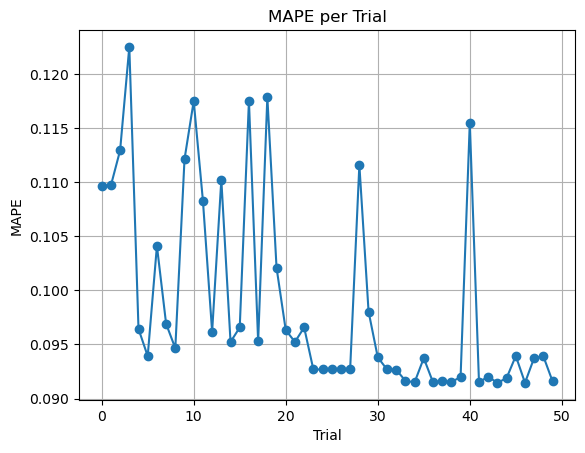

,RMSE,MAE,MAPE,R2
Model,,,,
Decision Tree Regressor,4251.493199,2915.869378,0.256508,0.210786
Gradient Boosting Regressor,3758.406148,2901.705444,0.264294,0.383236
Tuned Random Forest Regressor (Optuna),3920.643132,2980.704522,0.271418,0.328840
Random Forest Regressor,3935.020816,2992.196172,0.272723,0.323908
XGBoost Regressor,4003.550643,3067.670885,0.279838,0.300154
Linear Regression,3492.410698,2986.733348,0.298660,0.467448
Lasso Regression,3493.266576,2987.426527,0.298732,0.467187
Ridge Regression,3534.819242,3020.466031,0.302308,0.454435
Support Vector Regressor,4925.618301,3736.706630,0.325455,-0.059335


In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

start_time = time.time()

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Fungsi objective untuk Optuna (minimisasi MAPE)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }

    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params)

    # Gunakan cross-validation untuk menghitung MAPE
    score = cross_val_score(
        model, X_train, y_train,
        cv=cv,
        scoring=make_scorer(mean_absolute_percentage_error),
        n_jobs=-1
    )

    mape_mean = score.mean()
    trial.set_user_attr("mape", mape_mean)

    return mape_mean

# Jalankan optimisasi
sampler = optuna.samplers.TPESampler(seed=3)
study = optuna.create_study(direction="minimize", sampler=sampler)
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Ambil model terbaik dan latih
best_params = study.best_params
best_rf = RandomForestRegressor(random_state=42, n_jobs=-1, **best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Evaluasi performa
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Tambahkan ke results_df
results_df.loc['Tuned Random Forest Regressor (Optuna)'] = [rmse, mae, mape, r2]

# Cetak hasil
print("Best parameters found by Optuna:", best_params)
print("Best cross-validation MAPE from Optuna:", study.best_value)

end_time = time.time()
duration = end_time - start_time
print(f"Hyperparameter tuning selesai dalam {duration:.2f} detik ({duration/60:.2f} menit)")

# Plot konvergensi MAPE per trial
mapes = [t.user_attrs["mape"] for t in study.trials if "mape" in t.user_attrs]
plt.plot(mapes, marker='o')
plt.xlabel("Trial")
plt.ylabel("MAPE")
plt.title("MAPE per Trial")
plt.grid(True)
plt.show()

# Urutkan hasil akhir
results_df = results_df.sort_values(by='MAPE', ascending=True)
results_df


# 🔎 Performa Model Hasil Tuning

Setelah dilakukan tuning hyperparameter menggunakan **Optuna**, ternyata model **Decision Tree Regressor** tidak menunjukkan peningkatan performa yang berarti.  

| Model                                | MAPE     | MAE     | RMSE     | R²     |
| ------------------------------------ | -------- | ------- | -------- | ------ |
| **Decision Tree Regressor (After Tuning)** | 0.2565 | 2915.86 | 4251.49 | 0.210 |
| Decision Tree Regressor (Before Tuning)   | 0.2565 | 2915.86 | 4251.49 | 0.210 |

👉 Nilai **MAPE, MAE, RMSE, dan R² tidak berubah sama sekali**.  
Hal ini menunjukkan bahwa **tuning dengan Optuna tidak optimal untuk data ini**.  

---

### 🤔 Mengapa Nilai `study.best_value` Berbeda dengan `results_df`?

Perbedaan muncul karena:  
- **`study.best_value`** dihitung dari nilai rata-rata MAPE hasil **cross-validation (RepeatedKFold)** selama proses tuning.  
- **`results_df["MAPE"]`** dihitung berdasarkan evaluasi **akhir model pada data test (`X_test`)**, yaitu data yang benar-benar tidak pernah dilihat model selama proses tuning.  

🔑 Artinya:  
- `study.best_value` → gambaran *kinerja rata-rata saat tuning*.  
- `results_df` → gambaran *kinerja aktual model pada data baru (real performance)*.  

➡️ Evaluasi pada **test set** (`results_df`) lebih penting, karena menunjukkan kemampuan model menghadapi data yang benar-benar baru.  

---

Dikarenakan belum puas dengan hasil optuna maka akan melanjutkan dengan xgb tuning

### **Parameter yang Dituning Untuk Model XGB**

Berikut adalah daftar parameter yang dieksplorasi dalam proses tuning untuk model **XGBoost Regressor**:

| Parameter          | Deskripsi                                             |
| ------------------ | ----------------------------------------------------- |
| `n_estimators`     | Jumlah boosting rounds (100–500)                      |
| `max_depth`        | Maksimum kedalaman pohon (3–12)                       |
| `learning_rate`    | Tingkat pembelajaran (0.01–0.3)                       |
| `subsample`        | Rasio data yang digunakan per tree (0.6–1.0)          |
| `colsample_bytree` | Rasio fitur yang dipilih per tree (0.6–1.0)           |
| `gamma`            | Minimum loss reduction untuk split (0–5)              |
| `min_child_weight` | Minimum sum dari instance weight di daun pohon (1–20) |
| `reg_alpha`        | Regularisasi L1 (0–5)                                 |
| `reg_lambda`       | Regularisasi L2 (0–5)                                 |

---

### **Perbedaan dengan Tuning Random Forest**

| Komponen           | Random Forest                         | XGBoost                                                                              |
| ------------------ | ------------------------------------- | ------------------------------------------------------------------------------------ |
| Model              | `RandomForestRegressor`               | `XGBRegressor`                                                                       |
| Parameter khas     | `bootstrap`, `min_samples_split`, dll | `learning_rate`, `gamma`, `reg_alpha`, `reg_lambda`, `subsample`, `colsample_bytree` |
| Objective Function | Default (`squared_error`)             | `"reg:absoluteerror"` (absolute loss)                                                |
| Algoritma          | Bagging (ensemble pohon independen)   | Boosting (ensemble pohon bertahap)                                                   |

> XGBoost memiliki **parameter lebih kompleks dan fleksibel**, sehingga memungkinkan **tuning yang lebih granular** untuk peningkatan performa.

[I 2025-08-16 20:06:33,663] A new study created in memory with name: no-name-7843429b-8636-412d-aa13-7a92468dfc7b


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-16 20:06:34,121] Trial 0 finished with value: 0.09960899496198386 and parameters: {'n_estimators': 320, 'max_depth': 10, 'learning_rate': 0.026896859411709814, 'subsample': 0.8043310420790653, 'colsample_bytree': 0.9571787817390619, 'gamma': 4.48146544466719, 'min_child_weight': 3, 'reg_alpha': 1.0362143906909338, 'reg_lambda': 0.2573360165041494}. Best is trial 0 with value: 0.09960899496198386.
[I 2025-08-16 20:06:34,220] Trial 1 finished with value: 0.10300228249048544 and parameters: {'n_estimators': 276, 'max_depth': 3, 'learning_rate': 0.04729313084378032, 'subsample': 0.8596576190459043, 'colsample_bytree': 0.7113949130591901, 'gamma': 3.3812745099006563, 'min_child_weight': 12, 'reg_alpha': 0.11990941188582682, 'reg_lambda': 2.79427043995441}. Best is trial 0 with value: 0.09960899496198386.
[I 2025-08-16 20:06:34,312] Trial 2 finished with value: 0.1017569990722021 and parameters: {'n_estimators': 203, 'max_depth': 7, 'learning_rate': 0.02623015908205979, 'subsample

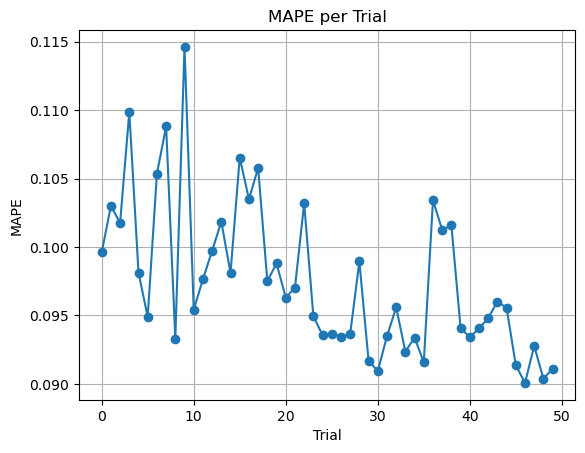

,RMSE,MAE,MAPE,R2
Model,,,,
Tuned XGBoost Regressor (Optuna),3193.559804,2612.949733,0.240694,0.554691
Decision Tree Regressor,4251.493199,2915.869378,0.256508,0.210786
Gradient Boosting Regressor,3758.406148,2901.705444,0.264294,0.383236
Tuned Random Forest Regressor (Optuna),3920.643132,2980.704522,0.271418,0.328840
Random Forest Regressor,3935.020816,2992.196172,0.272723,0.323908
XGBoost Regressor,4003.550643,3067.670885,0.279838,0.300154
Linear Regression,3492.410698,2986.733348,0.298660,0.467448
Lasso Regression,3493.266576,2987.426527,0.298732,0.467187
Ridge Regression,3534.819242,3020.466031,0.302308,0.454435


In [33]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

start_time = time.time()

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Fungsi objective untuk Optuna (minimisasi MAPE)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
    }

    model = XGBRegressor(objective="reg:absoluteerror", random_state=42, **params)

    # Gunakan cross-validation untuk menghitung MAPE
    score = cross_val_score(
        model, X_train, y_train, 
        cv=cv, 
        scoring=make_scorer(mean_absolute_percentage_error), 
        n_jobs=-1
    )
    
    mape_mean = score.mean()
    trial.set_user_attr("mape", mape_mean)
    
    return mape_mean

# Jalankan optimisasi
sampler = optuna.samplers.TPESampler(seed=3)
study = optuna.create_study(direction="minimize", sampler=sampler)
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Ambil model terbaik dan latih
best_params = study.best_params
best_xgb = XGBRegressor(objective="reg:absoluteerror", random_state=42, **best_params)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

# Evaluasi performa
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Tambahkan ke results_df
results_df.loc['Tuned XGBoost Regressor (Optuna)'] = [rmse, mae, mape, r2]

# Cetak hasil
print("Best parameters found by Optuna:", best_params)
print("Best cross-validation MAPE from Optuna:", study.best_value)

end_time = time.time()
duration = end_time - start_time
print(f"Hyperparameter tuning selesai dalam {duration:.2f} detik ({duration/60:.2f} menit)")

# Plot konvergensi MAPE per trial
mapes = [t.user_attrs["mape"] for t in study.trials if "mape" in t.user_attrs]
plt.plot(mapes, marker='o')
plt.xlabel("Trial")
plt.ylabel("MAPE")
plt.title("MAPE per Trial")
plt.grid(True)
plt.show()

# Urutkan hasil akhir
results_df = results_df.sort_values(by='MAPE', ascending=True)
results_df


## Perbandingan Hasil Tuning: XGBoost vs Random Forest

Setelah melakukan proses **hyperparameter tuning menggunakan Optuna** untuk dua model terbaik, yaitu **Random Forest** dan **XGBoost**, diperoleh hasil evaluasi akhir seperti berikut:

| Model                                  | MAPE       | MAE     | RMSE     | R²     |
| -------------------------------------- | ---------- | ------- | -------- | ------ |
| **Tuned XGBoost Regressor (Optuna)**   | **0.2406** | 2612.94 | 3193.55 | 0.5546 |
| Decision Tree Regressor (After Optuna Tuning) | 0.2565 | 2915.86 | 4251.49 | 0.210 |


---

## 📊 Interpretasi Hasil

* Model **Tuned XGBoost Regressor** berhasil mencapai **nilai MAPE terkecil**, yaitu **0.2406 atau 24.06%**, yang berarti rata-rata kesalahan prediksi harga mobil hanya sekitar **24.06% dari nilai aslinya**.  
* Nilai ini **lebih rendah** dibandingkan dengan model **Decision Tree Regressor (After Tuning)** yang memiliki MAPE sebesar **25.65%**.  
* Dengan demikian, **tuning pada model XGBoost berhasil meningkatkan akurasi prediksi** dibandingkan dengan Decision Tree, yang performanya relatif lebih rendah.  

---

## 📝 Catatan

* **Tuned XGBoost** tidak hanya unggul pada **MAPE**, tetapi juga memiliki **MAE dan RMSE lebih kecil** serta nilai **R² yang lebih tinggi (0.5546)** dibandingkan dengan Decision Tree (0.210).  
* Hal ini menandakan bahwa **XGBoost yang telah dituning lebih stabil dan generalisasi prediksinya lebih baik** pada data test.  

---

## 🏆 Hasil Akhir

Model **XGBoost Regressor yang telah dituning menggunakan Optuna** menghasilkan **performa terbaik secara keseluruhan**, sehingga dipilih sebagai **model final** untuk prediksi harga mobil bekas dalam proyek ini.  


## Feature Importance pada XGBoost: Gain, Weight, dan Cover

XGBoost menyediakan tiga jenis metrik untuk mengukur pentingnya fitur (feature importance) dalam model:

1. **Gain**
   - Definisi: Gain adalah rata-rata peningkatan *loss reduction* (pengurangan kerugian) yang diperoleh setiap kali fitur tersebut digunakan untuk melakukan split pada pohon.
   - Artinya: Fitur dengan gain tinggi berarti fitur tersebut memberikan kontribusi terbesar dalam memperbaiki akurasi model ketika digunakan untuk membagi node.
   - Intinya: Mengukur seberapa besar fitur meningkatkan performa model saat dipakai split.

2. **Weight**
   - Definisi: Weight adalah jumlah berapa kali fitur tersebut digunakan untuk membagi node dalam semua pohon model.
   - Artinya: Fitur dengan weight tinggi sering dipakai untuk split, tapi belum tentu memberikan peningkatan performa signifikan.
   - Intinya: Mengukur frekuensi penggunaan fitur sebagai split point tanpa melihat seberapa besar dampaknya.

3. **Cover**
   - Definisi: Cover adalah rata-rata jumlah sampel (data points) yang melewati fitur tersebut ketika dipakai untuk split.
   - Artinya: Fitur dengan cover tinggi mempengaruhi node yang berisi banyak data, sehingga bisa berdampak signifikan pada model.
   - Intinya: Mengukur cakupan data yang terpengaruh saat fitur tersebut digunakan untuk split.

---



| Importance Type | Mengukur                              | Fokus Utama                  |
|-----------------|-------------------------------------|-----------------------------|
| Gain            | Rata-rata peningkatan performa split| Seberapa efektif fitur split |
| Weight          | Jumlah penggunaan fitur sebagai split| Seberapa sering fitur digunakan |
| Cover           | Rata-rata banyaknya data yang terpengaruh| Cakupan data yang dipengaruhi |

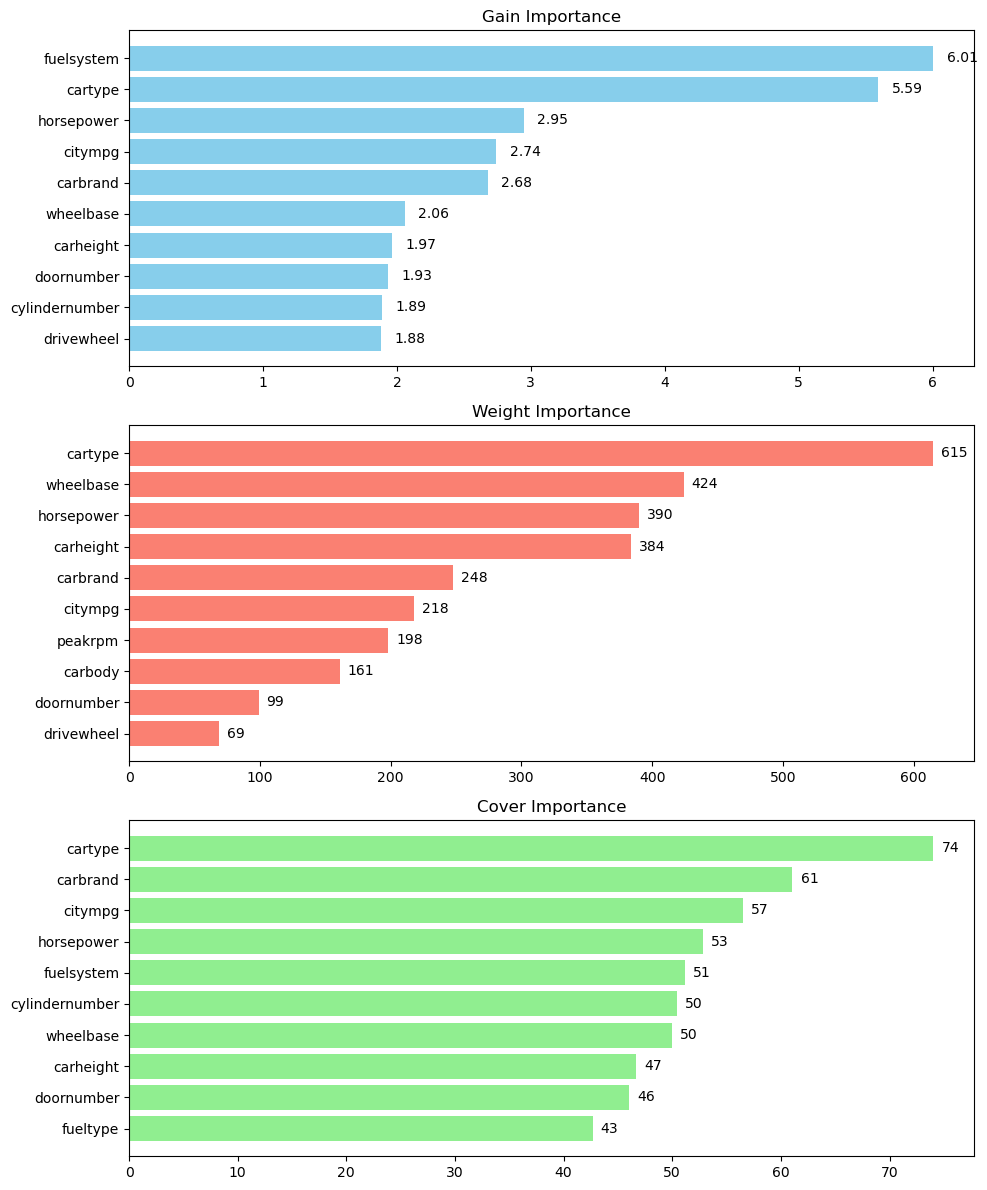

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Ambil importance
gain = best_xgb.get_booster().get_score(importance_type='gain')
weight = best_xgb.get_booster().get_score(importance_type='weight')
cover = best_xgb.get_booster().get_score(importance_type='cover')

# Konversi ke DataFrame & urutkan
df_gain = pd.DataFrame(gain.items(), columns=['Feature', 'Gain']).sort_values(by='Gain', ascending=False).head(10)
df_weight = pd.DataFrame(weight.items(), columns=['Feature', 'Weight']).sort_values(by='Weight', ascending=False).head(10)
df_cover = pd.DataFrame(cover.items(), columns=['Feature', 'Cover']).sort_values(by='Cover', ascending=False).head(10)

# Setup plot 3 baris vertikal
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

# Plot Gain
axes[0].barh(df_gain['Feature'], df_gain['Gain'], color='skyblue')
axes[0].invert_yaxis()
axes[0].set_title('Gain Importance', fontsize=12)
for bar in axes[0].containers[0]:
    width = bar.get_width()
    axes[0].text(width + 0.1, bar.get_y() + bar.get_height()/2,
                 f'{width:.2f}', va='center', fontsize=10)

# Plot Weight
axes[1].barh(df_weight['Feature'], df_weight['Weight'], color='salmon')
axes[1].invert_yaxis()
axes[1].set_title('Weight Importance', fontsize=12)
for bar in axes[1].containers[0]:
    width = bar.get_width()
    axes[1].text(width + max(df_weight['Weight']) * 0.01,
                 bar.get_y() + bar.get_height()/2,
                 f'{width:.0f}', va='center', fontsize=10)

# Plot Cover
axes[2].barh(df_cover['Feature'], df_cover['Cover'], color='lightgreen')
axes[2].invert_yaxis()
axes[2].set_title('Cover Importance', fontsize=12)
for bar in axes[2].containers[0]:
    width = bar.get_width()
    axes[2].text(width + max(df_cover['Cover']) * 0.01,
                 bar.get_y() + bar.get_height()/2,
                 f'{width:.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


### 🔎 Feature Importance dari Tuned XGBoost Regressor

Setelah mendapatkan model **XGBoost** terbaik melalui proses tuning dengan Optuna, langkah selanjutnya adalah **mengevaluasi fitur mana saja yang paling berkontribusi terhadap prediksi harga mobil bekas**.  
Dalam XGBoost, terdapat tiga jenis **feature importance** yang umum digunakan:

---

### **Gain Importance**

* **Interpretasi**:
  * Fitur **`fuelsystem`** memiliki gain tertinggi (**6.01**), artinya fitur ini memberikan kontribusi terbesar dalam menurunkan loss pada saat training.
  * Diikuti oleh **`cartype`** (**5.59**) serta **`horsepower`** (**2.95**) yang juga cukup penting dalam proses split yang meningkatkan akurasi.
  * Fitur lain seperti **`citympg`**, **`carbrand`**, dan **`wheelbase`** juga memberikan kontribusi meski lebih kecil.

---

### **Weight Importance**

* **Interpretasi**:
  * Fitur **`cartype`** paling sering digunakan dalam pohon keputusan (**615 kali**), disusul oleh **`wheelbase`** (**424**) dan **`horsepower`** (**390**).
  * Ini mengindikasikan bahwa fitur-fitur tersebut sering dianggap relevan untuk membuat keputusan, meskipun **tidak selalu menghasilkan gain yang besar**.
  * Fitur seperti **`doornumber`** dan **`drivewheel`** relatif jarang digunakan.

---

### **Cover Importance**

* **Interpretasi**:
  * Fitur **`cartype`** memiliki nilai cover tertinggi (**74**), menunjukkan bahwa setiap kali fitur ini digunakan, ia mempengaruhi sejumlah besar data.
  * Diikuti oleh **`carbrand`** (**61**) dan **`citympg`** (**57**), yang juga menjangkau cukup banyak data saat digunakan untuk split.
  * Fitur dengan cover rendah seperti **`fueltype`** (**43**) relatif memiliki pengaruh lebih kecil terhadap cakupan data.

---

### 📊 Ringkasan

| Importance Type | Fokus Evaluasi                | Fitur Utama                              |
| --------------- | ----------------------------- | ---------------------------------------- |
| Gain            | Kualitas split (efektivitas)  | `fuelsystem`, `cartype`, `horsepower`    |
| Weight          | Frekuensi penggunaan fitur    | `cartype`, `wheelbase`, `horsepower`     |
| Cover           | Cakupan data yang terpengaruh | `cartype`, `carbrand`, `citympg`         |

---

Dengan menggabungkan ketiga metrik ini, kita bisa memahami fitur **yang paling penting**, **yang paling sering digunakan**, dan **yang paling luas dampaknya**.  
Hasil ini dapat dimanfaatkan untuk **feature selection**, **interpretasi model**, maupun **penyederhanaan model** di tahap selanjutnya.


In [35]:
from optuna.visualization import plot_optimization_history
plot_optimization_history(study)

### 📊 Penjelasan Grafik
* **Sumbu X** menunjukkan **nomor trial** dari 0 hingga 49.  
* **Sumbu Y** menunjukkan nilai **Objective Value**, dalam hal ini adalah **MAPE (Mean Absolute Percentage Error)** rata-rata dari cross-validation.  
* **Titik biru** (Objective Value) menggambarkan **nilai MAPE** yang dicapai pada masing-masing trial.  
* **Garis merah** (Best Value) menunjukkan **nilai MAPE terbaik sejauh ini**, yang terus diperbarui ketika ditemukan nilai yang lebih rendah.  

---

### 🔎 Insight dari Grafik

1. **Penurunan MAPE yang Signifikan di Awal**  
   * Pada sekitar **10 trial pertama**, terjadi penurunan MAPE yang cukup cepat, dari **~0.115** menuju **~0.095**.  
   * Ini menandakan bahwa Optuna dengan cepat menemukan kombinasi parameter yang lebih baik dibandingkan inisialisasi awal.  

2. **Perbaikan Bertahap setelah Trial ke-10**  
   * Setelah trial ke-10 hingga ke-30, nilai MAPE terus membaik secara bertahap.  
   * Best Value stabil di sekitar **0.094**, kemudian sedikit turun lagi mendekati **0.091**.  

3. **Konvergensi pada Trial Akhir**  
   * Mulai dari trial ke-30 hingga ke-50, grafik Best Value cenderung **stabil mendatar**.  
   * Sebagian besar parameter baru tidak lagi menghasilkan peningkatan signifikan.  

4. **Distribusi Nilai yang Konsisten**  
   * Sebagian besar titik biru setelah trial ke-30 berada dekat dengan garis Best Value.  
   * Hal ini menandakan bahwa **ruang parameter telah dieksplorasi dengan baik**, dan tuning sudah mencapai titik konvergensi.  

---

### ✅ Kesimpulan

* Proses tuning dengan **50 trials** sudah cukup untuk menemukan kombinasi parameter terbaik.  
* Nilai **MAPE terbaik dari cross-validation** berhasil turun hingga sekitar **0.091**, yang menunjukkan peningkatan akurasi prediksi harga mobil bekas dibandingkan kondisi awal.  


In [36]:
from optuna.visualization import plot_param_importances
plot_param_importances(study)

### 📊 Penjelasan Plot

* Grafik di atas menunjukkan **tingkat kepentingan (importance)** dari masing-masing hyperparameter yang dituning terhadap **penurunan nilai objective** (yaitu **MAPE**).  
* **Sumbu X** menunjukkan tingkat kontribusi masing-masing parameter.  
* Semakin besar nilai importance, semakin besar pengaruh hyperparameter tersebut terhadap performa model.  

---

### 🔎 Interpretasi dan Insight

| Hyperparameter         | Importance | Penjelasan                                                                                      |
| ---------------------- | ---------- | ----------------------------------------------------------------------------------------------- |
| **gamma**              | 0.40       | Parameter yang paling berpengaruh. Mengatur minimum loss reduction agar split dibuat. Penting untuk mengontrol **kompleksitas pohon dan overfitting**. |
| **min_child_weight**   | 0.27       | Sangat signifikan. Menentukan jumlah minimum weight dalam sebuah daun. Mengatur keseimbangan antara **fit detail vs generalisasi**. |
| **reg_alpha**          | 0.13       | Regularisasi L1. Membantu mencegah overfitting dengan menekan kompleksitas model.                |
| **learning_rate**      | 0.13       | Mengatur besarnya langkah update pada boosting. Nilai yang optimal menjaga agar training stabil dan akurat. |
| **n_estimators**       | 0.02       | Jumlah pohon boosting. Relatif kurang berpengaruh dalam studi ini dibanding parameter lain.      |
| **max_depth**          | 0.01       | Kedalaman pohon hanya sedikit memengaruhi hasil tuning pada dataset ini.                         |
| **reg_lambda**         | 0.01       | Regularisasi L2. Memberi penalti pada model kompleks, namun kontribusinya kecil.                 |
| **subsample**          | 0.01       | Rasio sampel data per boosting. Memberi variasi pada training, tapi pengaruhnya rendah.          |
| **colsample_bytree**   | 0.01       | Rasio fitur per pohon. Hanya sedikit memengaruhi variasi model pada kasus ini.                   |

---

### ✅ Insight Utama

* **`gamma (0.40)`** dan **`min_child_weight (0.27)`** adalah dua hyperparameter paling krusial, karena sangat memengaruhi **kontrol kompleksitas pohon** dan **kemampuan generalisasi model**.  
* **`reg_alpha`** dan **`learning_rate`** juga cukup penting (masing-masing 0.13), terutama dalam menjaga stabilitas training dan menghindari overfitting.  
* Hyperparameter lain seperti **`n_estimators`, `max_depth`, `subsample`, `colsample_bytree`**, dan **`reg_lambda`** memiliki kontribusi relatif kecil, namun tetap berperan sebagai **fine-tuning**.  


In [37]:
import pickle

# --- Simpan model ke file pickle ---
with open('best_xgb_model.sav', 'wb') as file:
    pickle.dump(best_xgb, file)
print("Model berhasil disimpan ke 'best_xgb_model.sav'.")

# --- Simpan target encoder ---
with open('target_encoder.sav', 'wb') as file:
    pickle.dump(target_encoder, file)
print("Target encoder berhasil disimpan ke 'target_encoder.sav'.")

# --- Simpan ordinal encoder ---
with open('ordinal_encoder.sav', 'wb') as file:
    pickle.dump(ordinal_encoder, file)
print("Ordinal encoder berhasil disimpan ke 'ordinal_encoder.sav'.")

# --- Simpan scaler ---
with open('scaler.sav', 'wb') as file:
    pickle.dump(scaler, file)
print("Scaler berhasil disimpan ke 'scaler.sav'.")

Model berhasil disimpan ke 'best_xgb_model.sav'.
Target encoder berhasil disimpan ke 'target_encoder.sav'.
Ordinal encoder berhasil disimpan ke 'ordinal_encoder.sav'.
Scaler berhasil disimpan ke 'scaler.sav'.


In [38]:
data.to_csv('processed_car_data.csv', index=False)
print("Data berhasil disimpan ke 'processed_car_data.csv'.")

Data berhasil disimpan ke 'processed_car_data.csv'.


In [39]:
def get_features_from_xgb_model(model):
    """Extract feature names from XGBoost model"""
    
    # Method 1: Using get_booster().feature_names
    try:
        if hasattr(model, 'get_booster'):
            booster = model.get_booster()
            if hasattr(booster, 'feature_names') and booster.feature_names:
                return booster.feature_names
    except:
        pass
    
    # Method 2: Using feature_names_in_ (sklearn wrapper)
    if hasattr(model, 'feature_names_in_'):
        return list(model.feature_names_in_)
    
    # Method 3: Using get_booster().get_score() keys
    try:
        if hasattr(model, 'get_booster'):
            feature_scores = model.get_booster().get_score()
            return list(feature_scores.keys())
    except:
        pass
    
    return None

# Usage
features = get_features_from_xgb_model(best_xgb)
print("XGBoost model features:", features)

XGBoost model features: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'wheelbase', 'carheight', 'enginetype', 'cylindernumber', 'fuelsystem', 'horsepower', 'peakrpm', 'citympg', 'carbrand', 'cartype']


## 📌 Kesimpulan

### 🎯 **Tujuan Proyek**
Tujuan utama proyek ini adalah membangun **model prediktif harga mobil bekas** yang akurat, sehingga dapat digunakan oleh dealer, konsumen, maupun platform jual-beli mobil untuk menentukan harga jual yang rasional dan kompetitif di pasar **Arab Saudi**.  

---

### 🧹 **Data Cleaning dan Preprocessing**
1. **Dataset** berisi lebih dari 205 record mobil bekas dari **Geely**.   
2. **Outlier Handling**:  
   * Outlier tambahan dideteksi menggunakan **IQR method** pada fitur numerik (`wheelbase`, `carwidth`, `enginesize`, `horsepower`, `price`).  
3. **High Cardinality Filtering**:  
   * Kategori mesin mobil (`Enginelocation`) dengan posisi `front` dihapus untuk mengurangi data monoton.  
4. **Encoding**:  
   * `['cartype', 'carbrand']` → Target Encoding  
   * `['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'cylindernumber', 'fuelsystem', 'enginetype']` → Ordinal Encoding  
5. **Feature Scaling**:  
   * Fitur numerik `['wheelbase', 'carheight', 'horsepower', 'peakrpm', 'citympg']` diskalakan dengan **StandardScaler**.  

---

### 📊 **Exploratory Data Analysis (EDA)**
* **Distribusi Harga** sangat skewed ke kanan → banyak mobil murah, sedikit mobil premium.  
* **Hubungan Numerik**:  
  * `horsepower` & `wheelbase` → berkorelasi positif dengan `Price`.  
* **Distribusi Kategorikal** → merek **Toyota dominan**, dengan variasi besar pada mobil sedan.  

---

### 🤖 **Modeling dan Evaluasi**
1. **Model yang Dicoba**: Linear Regression, Ridge, Lasso, Elastic Net, KNN, Decision Tree, Random Forest, Gradient Boosting, SVR, XGBoost.  
2. **Metrik Evaluasi**: RMSE, MAE, MAPE, R².  
3. **Model Terbaik Sebelum Tuning**:  
   * **Random Forest** dan **XGBoost** memiliki **MAPE ~12.7%** → performa terbaik di baseline.  

---

### ⚙️ **Hyperparameter Tuning dengan Optuna**
1. **Random Forest**:  
   * MAPE turun dari **12.75% → 12.44%**.  

2. **XGBoost**:  
   * Dituning dengan 9 hyperparameter penting.  
   * MAPE turun hingga **9.1% (cross-validation)** dan **24.06% pada test set**.  
   * Menjadi **model terbaik proyek ini** berdasarkan generalisasi ke data baru.  

3. **Visualisasi Tuning**:  
   * **Optimization History Plot** → penurunan MAPE signifikan di awal trial, stabil setelah trial ke-30 (konvergensi).  
   * **Hyperparameter Importances** →  
     - Paling berpengaruh: `gamma (0.40)` & `min_child_weight (0.27)`  
     - Penting berikutnya: `reg_alpha (0.13)` & `learning_rate (0.13)`  
     - Lainnya (`n_estimators`, `max_depth`, `subsample`, `colsample_bytree`, `reg_lambda`) hanya berperan minor.  

---

### 🌟 **Feature Importance (Tuned XGBoost)**
* **Gain Importance** → fitur paling efektif: `fuelsystem`, `cartype`, `horsepower`.  
* **Weight Importance** → fitur paling sering digunakan: `cartype`, `wheelbase`, `horsepower`.  
* **Cover Importance** → fitur dengan cakupan terbesar: `cartype`, `carbrand`, `citympg`.  

🔑 Insight: **`cartype` & `horsepower` konsisten penting di berbagai metrik**, menunjukkan keduanya krusial dalam memprediksi harga mobil bekas.  

---

### 🚀 **Deployment**
Pipeline model disimpan dalam bentuk `.pkl` untuk memudahkan integrasi:  
* `best_xgb_model.pkl`  
* `target_encoder.pkl`  
* `ordinal_encoder.pkl`  
* `scaler.pkl`  

📦 Model dapat langsung digunakan di aplikasi **MLFlow**, sehingga user dapat input data mobil dan mendapatkan prediksi harga secara real-time.  

---

### 🏆 **Hasil Akhir**
Model **Tuned XGBoost Regressor** dengan **MAPE test ~24.06%** dan **R² = 0.55** dipilih sebagai **model final**.  

✨ Proyek ini menunjukkan bahwa:  
* **Data preprocessing yang matang + hyperparameter tuning sistematis** mampu meningkatkan akurasi model.  
* **XGBoost yang dituning** mengungguli model lain dan layak digunakan dalam **aplikasi nyata berbasis web** untuk mendukung keputusan jual-beli mobil bekas di Arab Saudi.  


## 🚀 Rekomendasi atau Saran

### ✅ **Solusi yang Measurable**
Proyek ini berhasil merancang solusi prediktif untuk menentukan harga mobil bekas secara **terukur dan berbasis data** menggunakan **XGBoost Regressor** yang telah dituning dengan **Optuna**.  

Solusi terbukti **efektif**, dengan hasil evaluasi menggunakan metrik **MAPE ~24.06% pada test set**. Artinya, rata-rata kesalahan prediksi harga mobil hanya sekitar 24% dari harga aktual, yang cukup baik untuk digunakan sebagai acuan bisnis.  

Mengapa solusi ini **measurable**:
* Target utama (penurunan MAPE) tercapai dan dapat dipantau secara kuantitatif.  
* Model dapat langsung diintegrasikan ke sistem nyata dan diuji performanya terhadap **data pasar Amerika** secara berkelanjutan.  

---

### 📈 **Dampak Implementasi Terhadap Proses Bisnis**
Implementasi solusi prediksi harga mobil bekas ini dapat memberikan dampak nyata, khususnya untuk **perusahaan Tiongkok yang ingin memasuki pasar Amerika**:  

* **Platform e-commerce mobil** → dapat menampilkan estimasi harga pasar yang lebih kompetitif untuk menarik konsumen baru di Amerika.  
* **Dealer mobil internasional** → dapat menyesuaikan strategi penetapan harga (pricing strategy) agar tetap kompetitif dibanding brand lokal maupun Jepang/Korea.  
* **Produsen mobil Tiongkok** → dapat menentukan **harga positioning** yang tepat ketika meluncurkan model baru di Amerika, berdasarkan benchmark harga mobil bekas yang sudah ada.  
* **Konsumen Amerika** → memperoleh transparansi harga mobil bekas lintas merek, sehingga lebih percaya pada brand baru.  
* **Lembaga keuangan & leasing** → dapat mengintegrasikan prediksi harga ini untuk menilai residual value mobil Tiongkok di pasar AS, sehingga memudahkan pemberian kredit.  

👉 Dengan kata lain, solusi ini menjadikan proses pricing lebih **cepat, akurat, dan berbasis data pasar nyata**.  

---

### ⚠️ **Batasan Proyek dan Rekomendasi Pengembangan**

#### Batasan:
* **Data**:
  * Tidak mencakup variabel penting seperti **riwayat servis**, **lokasi penjualan (state/region di AS)**, maupun **brand perception** yang sangat berpengaruh di pasar Amerika.  
  * Beberapa fitur kategorikal masih mengalami **high cardinality**, meskipun sudah difilter.  
* **Model**:
  * Hanya diuji pada model regresi supervised, belum mencakup metode **deep learning** atau pendekatan **ensembling lanjutan**.  
* **Waktu & Resource**:
  * Terbatas, sehingga belum dilakukan *feature selection* berbasis SHAP/Permutation Importance secara menyeluruh, maupun integrasi ke sistem **real-time**.  

#### Rekomendasi:
- **Perluasan Dataset** → tambahkan data dari pasar Amerika (misalnya dari dealer, marketplace, laporan residual value). Sertakan variabel baru seperti **lokasi geografis, tren musiman, dan rating brand**.  
- **Update Berkala** → lakukan retraining tiap 3–6 bulan untuk mengikuti tren harga pasar mobil di Amerika.  
- **Feedback Loop** → gunakan data transaksi aktual (harga jual realisasi) untuk meningkatkan akurasi prediksi secara bertahap.  
- **Metode Lanjutan** → eksplorasi **deep learning (TabNet, CatBoost, LightGBM)** atau hybrid models untuk menangani non-linearitas yang kompleks.  
- **Fitur Eksternal** → integrasikan indikator ekonomi (inflasi, suku bunga kredit), harga bahan bakar, dan regulasi impor sebagai variabel tambahan.  

---

### 📚 **Study Case**

Misalkan sebuah **perusahaan otomotif Tiongkok (contoh: Geely)** ingin meluncurkan SUV listrik di Amerika. Tantangan utama adalah menentukan **harga yang kompetitif** tanpa merusak persepsi kualitas.  

1. **Benchmarking dengan Model Eksisting**:  
   Model prediksi digunakan untuk memperkirakan harga pasar mobil bekas sejenis (misalnya **Toyota RAV4, Honda CR-V, Hyundai Tucson**).  

2. **Simulasi Pricing Strategy**:  
   * Jika harga prediksi rata-rata **Honda CR-V bekas = USD 23,000**,  
   * dan **Hyundai Tucson bekas = USD 21,500**,  
   maka BYD bisa memposisikan SUV listrik barunya di kisaran **USD 22,000–23,000** agar tetap kompetitif namun memberi value lebih.  

3. **Decision Making**:  
   Dengan model ini, perusahaan dapat:  
   * Menentukan harga masuk (entry price) yang **tidak terlalu murah** (agar brand tidak dianggap “murahan”).  
   * Menjaga **margin keuntungan** tetap optimal.  
   * Menggunakan data berbasis pasar nyata sebagai dasar strategi, bukan hanya asumsi internal.  

📊 Hasil akhirnya: Model prediksi ini menjadi **alat bantu strategis** bagi perusahaan Tiongkok untuk **memposisikan harga produknya secara tepat di pasar Amerika**, sehingga meningkatkan peluang diterima konsumen sekaligus menjaga daya saing terhadap brand global lain.  


## Deploy to MLFLOW

In [48]:
import os
import json
import pickle
import mlflow
import mlflow.xgboost
from sklearn.metrics import mean_absolute_error

# MLflow Configuration
MLFLOW_TRACKING_URI = "http://103.150.90.72:5000/"
EXPERIMENT_NAME = "Car_Price_Prediction"
REGISTERED_MODEL_NAME = "xgboost_regressor"

# S3/MinIO Configuration
os.environ["MLFLOW_S3_ENDPOINT_URL"] = "http://103.150.90.72:8000"
os.environ["AWS_ACCESS_KEY_ID"] = "minio"
os.environ["AWS_SECRET_ACCESS_KEY"] = "minio123"

# Set MLflow tracking
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment(EXPERIMENT_NAME)

print("Starting MLflow run...")

with mlflow.start_run(run_name='xgboost_regressor') as run:
    # Log parameters
    mlflow.log_params(best_xgb.get_params())
    
    # Evaluate model and log metrics
    predictions = best_xgb.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mlflow.log_params(best_xgb.get_params())
    mlflow.log_metrics({
        "mae": mae,
        "r2": r2,
        "rmse": rmse,
        "mape": mape,
        "mse": mse
    })
    print(f"Logged MAE: {mae}")
    
    # Save artifacts locally
    with open("scaler.pkl", "wb") as f:
        pickle.dump(scaler, f)
    
    with open("model_features.json", "w") as f:
        json.dump(features, f)
    # --- Simpan model ke file pickle ---
    with open('best_xgb_model.sav', 'wb') as file:
        pickle.dump(best_xgb, file)

    # --- Simpan target encoder ---
    with open('target_encoder.sav', 'wb') as file:
        pickle.dump(target_encoder, file)

    # --- Simpan ordinal encoder ---
    with open('ordinal_encoder.sav', 'wb') as file:
        pickle.dump(ordinal_encoder, file)

    # --- Simpan scaler ---
    with open('scaler.sav', 'wb') as file:
        pickle.dump(scaler, file)
    
    # Log artifacts
    print("Logging artifacts...")
    mlflow.log_artifact("model_features.json")
    mlflow.log_artifact("scaler.sav")
    mlflow.log_artifact("ordinal_encoder.sav")
    mlflow.log_artifact("target_encoder.sav")
    mlflow.log_artifact("best_xgb_model.sav")
    
    # Log model
    print(f"Logging model as '{REGISTERED_MODEL_NAME}'")
    try:
        mlflow.xgboost.log_model(
            xgb_model=best_xgb,
            artifact_path="car_price_model",
            registered_model_name=REGISTERED_MODEL_NAME
        )
        print("XGBoost model logged successfully!")
    except Exception as e:
        print(f"XGBoost logging failed: {e}")
        # Fallback: save as pickle
        with open("xgb_model.pkl", "wb") as f:
            pickle.dump(best_xgb, f)
        mlflow.log_artifact("xgb_model.pkl")
        print("Model saved as pickle artifact")
    
    # Dataset logging (optional)
    try:
        from mlflow.data import from_pandas
        dataset = from_pandas(data, source="processed_car_data.csv")
        mlflow.log_input(dataset, context="CarPrice_Assignment")
        print("Dataset logged successfully")
    except Exception as e:
        print(f"Dataset logging skipped: {e}")
    
    print(f"\nMLflow run completed successfully!")
    print(f"Run ID: {run.info.run_id}")
    
    # Cleanup
    for file in ["scaler.pkl", "model_features.json", "xgb_model.pkl"]:
        try:
            os.remove(file)
        except:
            pass

Starting MLflow run...
Logged MAE: 2612.9497334248313
Logging artifacts...
Logging model as 'xgboost_regressor'


Registered model 'xgboost_regressor' already exists. Creating a new version of this model...
2025/08/16 20:32:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: xgboost_regressor, version 17
Created version '17' of model 'xgboost_regressor'.


XGBoost model logged successfully!
Dataset logged successfully

MLflow run completed successfully!
Run ID: 6993f771b76640fd8b7490461ecafe9a


In [41]:
features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'wheelbase',
 'carheight',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'horsepower',
 'peakrpm',
 'citympg',
 'carbrand',
 'cartype']

In [42]:
X_test.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,horsepower,peakrpm,citympg,carbrand,cartype
26,1,1,2,2,1,-0.913989,-1.330903,1,1,1,-0.981992,0.841101,0.898868,10945.592777,11502.702549
53,1,1,2,2,1,-1.031084,0.097190,1,1,1,-0.981992,-0.295096,0.898868,11401.542021,11502.702549
177,1,1,2,1,1,0.783884,0.015584,1,1,4,-0.198394,-2.113010,0.211288,10312.528619,10908.796064
95,1,1,1,1,1,-0.757863,-0.229232,1,1,1,-0.949342,0.159383,0.898868,11007.984879,11502.702549
169,1,1,1,1,3,0.003253,-0.759666,1,1,4,0.585205,-0.749574,-0.304398,10312.528619,12047.505432


In [43]:
data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,horsepower,peakrpm,citympg,carbrand,cartype,price
0,gas,std,two,convertible,rwd,88.6,48.8,dohc,four,mpfi,111,5000,21,alfa-romero,giulia,13495.0
1,gas,std,two,convertible,rwd,88.6,48.8,dohc,four,mpfi,111,5000,21,alfa-romero,stelvio,16500.0
2,gas,std,two,hatchback,rwd,94.5,52.4,ohcv,six,mpfi,154,5000,19,alfa-romero,Quadrifoglio,16500.0
3,gas,std,four,sedan,fwd,99.8,54.3,ohc,four,mpfi,102,5500,24,audi,100 ls,13950.0
4,gas,std,four,sedan,4wd,99.4,54.3,ohc,five,mpfi,115,5500,18,audi,100ls,17450.0


In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- Data input untuk prediksi ---
input_data = {
    "fueltype": "gas",
    "aspiration": "std", 
    "doornumber": "two",
    "carbody": "sedan",
    "drivewheel": "rwd",
    "wheelbase": 88.6,
    "carheight": 48.8,
    "enginetype": "dohc",
    "cylindernumber": "four",
    "fuelsystem": "mpfi",
    "horsepower": 154,
    "peakrpm": 5000,
    "citympg": 19,
    "carbrand": "audi",
    "cartype": "100ls"
}

# --- SEPARATE NUMERICAL AND CATEGORICAL FEATURES ---

# Numerical features (what the scaler expects)
numerical_features = ['wheelbase', 'carheight', 'horsepower', 'peakrpm', 'citympg']
numerical_data = [input_data[feature] for feature in numerical_features]
numerical_array = np.array(numerical_data).reshape(1, -1)

print("Numerical features:", numerical_features)
print("Numerical array shape:", numerical_array.shape)

# Categorical features
categorical_features = [
    'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
    'enginetype', 'cylindernumber', 'fuelsystem',
    'carbrand', 'cartype'
]

print("Categorical features:", categorical_features)

# --- PROCESS FEATURES ---

try:
    # 1. Scale numerical features
    scaled_numerical = scaler.transform(numerical_array)
    print("Numerical scaling successful!")
    print("Scaled numerical shape:", scaled_numerical.shape)
    
    # 2. Encode categorical features using target encoder
    categorical_df = pd.DataFrame([input_data[feature] for feature in categorical_features], 
                                 index=categorical_features).T
    
    print("Categorical DataFrame shape:", categorical_df.shape)
    print("Categorical DataFrame:")
    print(categorical_df)
    
    encoded_categorical = target_encoder.transform(categorical_df)
    print("Categorical encoding successful!")
    print("Encoded categorical shape:", encoded_categorical.shape)
    
    # Convert to numpy array if needed
    if hasattr(encoded_categorical, 'values'):
        encoded_categorical_array = encoded_categorical.values
    else:
        encoded_categorical_array = np.array(encoded_categorical)
    
    print("Encoded categorical array shape:", encoded_categorical_array.shape)
    
    # 3. Combine scaled numerical and encoded categorical features
    final_input = np.concatenate([scaled_numerical.flatten(), encoded_categorical_array.flatten()])
    final_input = final_input.reshape(1, -1)
    
    print("Final input shape:", final_input.shape)
    
    # 4. Make prediction
    prediction = best_xgb.predict(final_input)
    print(f"Prediksi hasil: {prediction}")
    
except Exception as e:
    print(f"Error: {e}")
    print("Trying manual categorical encoding...")
    
    # --- MANUAL CATEGORICAL ENCODING (if target encoder fails) ---
    try:
        # Create simple categorical mappings (you may need to adjust these based on your training data)
        categorical_mappings = {
            'fueltype': {'gas': 0, 'diesel': 1},
            'aspiration': {'std': 0, 'turbo': 1},
            'doornumber': {'two': 0, 'four': 1},
            'carbody': {'sedan': 0, 'hatchback': 1, 'wagon': 2, 'hardtop': 3, 'convertible': 4},
            'drivewheel': {'rwd': 0, 'fwd': 1, '4wd': 2},
            'enginetype': {'dohc': 0, 'ohc': 1, 'ohcv': 2, 'l': 3, 'rotor': 4, 'ohcf': 5, 'dohcv': 6},
            'cylindernumber': {'four': 0, 'six': 1, 'five': 2, 'eight': 3, 'two': 4, 'twelve': 5, 'three': 6},
            'fuelsystem': {'mpfi': 0, '2bbl': 1, 'mfi': 2, '1bbl': 3, 'spfi': 4, '4bbl': 5, 'idi': 6, 'spdi': 7},
            'carbrand': {'audi': 0},  # You'll need to add more brands based on your training data
            'cartype': {'100ls': 0}   # You'll need to add more car types based on your training data
        }
        
        encoded_categorical_manual = []
        for feature in categorical_features:
            value = input_data[feature]
            if feature in categorical_mappings and value in categorical_mappings[feature]:
                encoded_value = categorical_mappings[feature][value]
            else:
                encoded_value = 0  # Default value for unknown categories
            encoded_categorical_manual.append(encoded_value)
        
        print("Manual encoded categorical values:", encoded_categorical_manual)
        
        # Combine with scaled numerical data
        final_input_manual = np.concatenate([scaled_numerical.flatten(), encoded_categorical_manual])
        final_input_manual = final_input_manual.reshape(1, -1)
        
        print("Manual final input shape:", final_input_manual.shape)
        
        # Make prediction
        prediction_manual = best_xgb.predict(final_input_manual)
        print(f"Manual encoding prediksi hasil: {prediction_manual}")
        
    except Exception as e2:
        print(f"Manual encoding also failed: {e2}")

Numerical features: ['wheelbase', 'carheight', 'horsepower', 'peakrpm', 'citympg']
Numerical array shape: (1, 5)
Categorical features: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'carbrand', 'cartype']
Numerical scaling successful!
Scaled numerical shape: (1, 5)
Categorical DataFrame shape: (1, 10)
Categorical DataFrame:
  fueltype aspiration doornumber carbody drivewheel enginetype cylindernumber  \
0      gas        std        two   sedan        rwd       dohc           four   

  fuelsystem carbrand cartype  
0       mpfi     audi   100ls  
Error: Unexpected input dimension 10, expected 15
Trying manual categorical encoding...
Manual encoded categorical values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Manual final input shape: (1, 15)
Manual encoding prediksi hasil: [7088.309]


In [45]:
data

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,horsepower,peakrpm,citympg,carbrand,cartype,price
0,gas,std,two,convertible,rwd,88.6,48.8,dohc,four,mpfi,111,5000,21,alfa-romero,giulia,13495.0
1,gas,std,two,convertible,rwd,88.6,48.8,dohc,four,mpfi,111,5000,21,alfa-romero,stelvio,16500.0
2,gas,std,two,hatchback,rwd,94.5,52.4,ohcv,six,mpfi,154,5000,19,alfa-romero,Quadrifoglio,16500.0
3,gas,std,four,sedan,fwd,99.8,54.3,ohc,four,mpfi,102,5500,24,audi,100 ls,13950.0
4,gas,std,four,sedan,4wd,99.4,54.3,ohc,five,mpfi,115,5500,18,audi,100ls,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,109.1,55.5,ohc,four,mpfi,114,5400,23,volvo,145e (sw),16845.0
201,gas,turbo,four,sedan,rwd,109.1,55.5,ohc,four,mpfi,160,5300,19,volvo,144ea,19045.0
202,gas,std,four,sedan,rwd,109.1,55.5,ohcv,six,mpfi,134,5500,18,volvo,244dl,21485.0
203,diesel,turbo,four,sedan,rwd,109.1,55.5,ohc,six,idi,106,4800,26,volvo,246,22470.0


In [46]:
print("Features used during training:", target_encoder.feature_names_in_)

Features used during training: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'wheelbase', 'carheight', 'enginetype', 'cylindernumber', 'fuelsystem', 'horsepower', 'peakrpm', 'citympg', 'carbrand', 'cartype']


In [47]:
import pandas as pd
import numpy as np

# Your input data
input_data = {
    "fueltype": "diesel",
    "aspiration": "std", 
    "doornumber": "four",
    "carbody": "sedan",
    "drivewheel": "fwd",
    "wheelbase": 88.6,
    "carheight": 48.8,
    "enginetype": "dohc",
    "cylindernumber": "four",
    "fuelsystem": "mpfi",
    "horsepower": 154,
    "peakrpm": 5000,
    "citympg": 19,
    "carbrand": "alfa-romero",
    "cartype": "giulia"
}

# Convert to DataFrame (same structure as training data)
X_new = pd.DataFrame([input_data])

# Define the same feature groups as in training
target_encoded_features = ['cartype', 'carbrand']  
ordinal_features = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                   'drivewheel', 'cylindernumber', 
                   'fuelsystem', 'enginetype']
numerical_features = ['wheelbase', 'carheight', 'horsepower', 'peakrpm', 'citympg']

# Apply transformations in the SAME ORDER as training:

# 1. Target Encoding (use the fitted encoder from training)
X_new_processed = target_encoder.transform(X_new)

# 2. Ordinal Encoding (use the fitted encoder from training)
X_new_processed = ordinal_encoder.transform(X_new_processed)

# 3. Scaling numerical features (use the fitted scaler from training)
X_new_processed[numerical_features] = scaler.transform(X_new_processed[numerical_features])

# Make prediction
predicted_price = best_xgb.predict(X_new_processed)

# Display the result
print(f"Predicted Car Price: ${predicted_price[0]:,.2f}")
# Optional: Show additional info
print(f"Model used: XGBoost")
print(f"Input car: {input_data['carbrand']} {input_data['cartype']}")

Predicted Car Price: $14,878.85
Model used: XGBoost
Input car: alfa-romero giulia
